### [ÌîÑÎ°úÏ†ùÌä∏ : Ï£ºÏãù ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥ Î≥¥Ïûê]  

## [ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä]
 
- ÎåÄÌïúÎØºÍµ≠ ÎåÄÏû•Ï£º ÏÇºÏÑ±Ï†ÑÏûêÏóê ÎåÄÌïú Ï£ºÏãù ÏãúÏÑ∏Î•º ÏòàÏ∏°  
  Îç∞Ïù¥ÌÑ∞Îäî Í≥ºÍ±∞Ïùò ÏùºÏûêÎ≥Ñ ÏãúÏÑ∏  
  
  
- Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î∞õÏùÑ ÎßÅÌÅ¨  
[Yahoo Finance](https://finance.yahoo.com/?guccounter=1)  
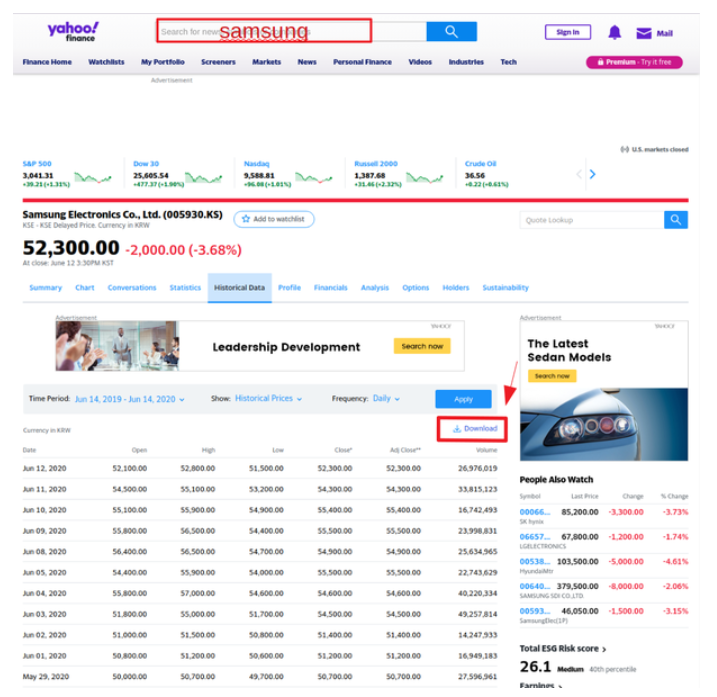  

- ÌÅ¥ÎùºÏö∞ÎìúÏóê ÏûàÎäî Ï£ºÏÜå  
  ~/aiffel/stock_prediction/data  
  005930.KS.csv 
  
  
- Îç∞Ïù¥ÌÑ∞ÏÖã ÏÑ§Î™Ö  
  1) ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume
  2) ÎÇ†ÏßúÎ≥ÑÎ°ú  
     -> ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•  
     -> Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©

(Ï£ºÏãù ÏãúÏû•ÏùÄ Ï†ïÌï¥ÏßÑ ÏãúÍ∞Ñ ÎèôÏïàÎßå Í±∞ÎûòÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§. Ï¢ÖÍ∞ÄÎûÄ ÌïòÎ£®Ïùò Ïû•Ïù¥ ÎßàÍ∞êÌïòÏòÄÏùÑ ÎïåÏùò Í∞ÄÍ≤©ÏûÖÎãàÎã§.)

### STEP 1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ  


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.pylab import rcParams

#import warnings
#warnings.filterwarnings('ignore')

# Time Series ÏÉùÏÑ±
dataset_filepath = os.getenv('HOME')+'/aiffel//stock_prediction/data/005930.KS.csv' 
#Ïù∏Îç±Ïä§Î•º dateÎ°ú ÎëêÍ≥† ÌååÏùºÏùÑ Î∂àÎü¨Ïò¥  
#parse_dates=True : Ìï¥Îãπ Ïª¨ÎüºÏùÑ datetime(ÎÇ†Ïßú)ÌòïÌÉúÎ°ú Î∞îÍæ∏Í≤†Îã§Îäî ÏùòÎØ∏
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) 
#Series Í∞ùÏ≤¥ ÏÉùÏÑ±= ts
#SeriesÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóêÏÑú ÌïòÎÇòÏùò Ïó¥Îßå Í∞ÄÏ†∏Ïò® Í≤É <- Ïó¨Í∏∞ÏÑ† Close Ïª¨Îüº(Ïó¥) Í∞ÄÏ†∏Ïò¥
#Series Ïù∏Îç±Ïä§ Íµ¨Ï°∞ ÎèôÏùºÌïòÍ≤å ÎßéÏùÄ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ìò∏ÌôòÌï¥ÏÑú ÏßÄÏõêÌï¥Ï£ºÎäîÎç∞ Í∞ÑÌòπ ÏóêÎü¨ ÏÉùÍ≤®ÏÑú
ts1 = df['Close']

print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

-----
### STEP 2. Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

#### 1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

##### 1) Í≤∞Ï∏°Ïπò Ïú†Î¨¥ ÌôïÏù∏

In [8]:
# ÏãúÍ≥ÑÏó¥(Time Series)ÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§.
ts1[ts1.isna()] 

Series([], Name: Close, dtype: float64)

- Í≤∞Ï∏°Ïπò ÏóÜÎäî Í≤É ÌôïÏù∏  


- ÎßåÏïΩ Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏóàÎã§Î©¥?  
  1) Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê ÏÇ≠Ï†ú(drop)  
  2) Í≤∞Ï∏°Ïπò ÏñëÏòÜÏùò Í∞íÎì§ÏùÑ Ïù¥Ïö©Ìï¥ÏÑú Ï†ÅÏ†àÌûà Î≥¥Í∞Ñ(interpolate)ÌïòÏó¨ ÎåÄÏûÖ  
  ex) 2ÏôÄ 4 ÏÇ¨Ïù¥ Îç∞Ïù¥ÌÑ∞Í∞Ä NaNÏù¥ÎùºÎ©¥ Ïù¥ Í∞íÏùÑ 3ÏúºÎ°ú Ï±ÑÏö∞Îäî Î∞©Ïãù  
  

#### 2. Î°úÍ∑∏ Î≥ÄÌôò  
- Ïö∞Î¶¨Îäî Ïï†Ï¥àÏóê Ïù¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ ÏÑ∏ÏõÄ  
  Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê ÏïàÏ†ïÏ†ÅÏù∏(Stationary) Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µÌï¥ÏïºÌï®  
  
  
- ÏãúÍ∞ÑÏ∂îÏù¥Ïóê Îî∞Îùº Î∂ÑÏÇ∞Ïù¥ Ï†êÏ†ê Ïª§ÏßÄÍ≥† ÏûàÏùÑ Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê  
  Î°úÍ∑∏Ìï®ÏàòÎ°ú Î≥ÄÌôòÌï¥ÏÑú ÏãúÍ∞ÑÏ∂îÏù¥Ïóê Îî∞Î•∏ Î∂ÑÏÇ∞ÏùÑ ÏùºÏ†ïÌïòÍ≤å ÎßåÎì¶  

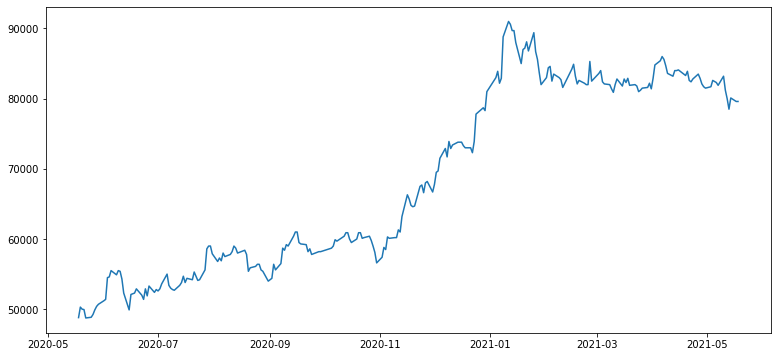

In [9]:
#Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖã plot
plt.plot(ts1)

#ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº Í≥ÑÏÜç Ï¶ùÍ∞ÄÌï®  

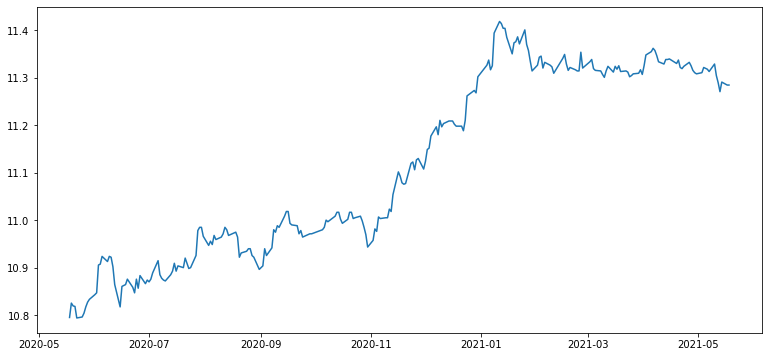

In [10]:
# Î°úÍ∑∏ Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞ÏÖã plot
ts1_log = np.log(ts1)
plt.plot(ts1_log)

### STEP 3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù  

### 1. Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù  


##### 1) Í∏∞Î≥∏ ÏãúÍ∞ÅÌôî

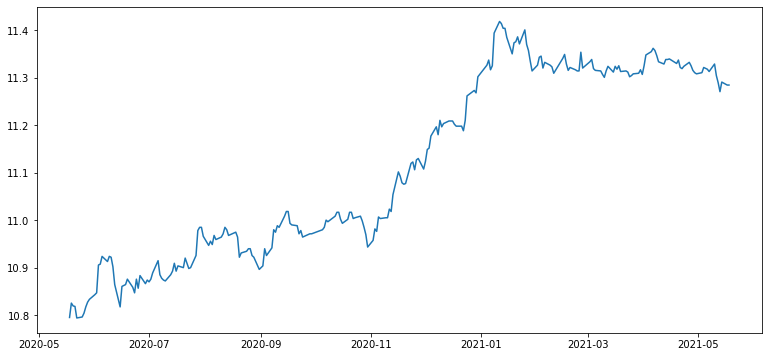

In [11]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6   
# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î¶º
plt.plot(ts1_log)

- ÏãúÍ∞ÑÏóê Îî∞Îùº ÌèâÍ∑†, Î∂ÑÏÇ∞Ïù¥ ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ïª§ÏßÄÎäî Ìå®ÌÑ¥Ïù¥ Î≥¥ÏûÑ  
- Ìå®ÌÑ¥Ïù¥ ÎààÏóê ÎùÑÍ≤å Ïûò Î≥¥Ïù¥Îäî Ìé∏Ïù¥ ÏïÑÎãò  


##### 2) ÌÜµÍ≥ÑÏ†Å ÌäπÏÑ± Î™ÖÎ£åÌïòÍ≤å ÏãúÍ∞ÅÌôî  
ÌèâÍ∑†, Î∂ÑÏÇ∞, ÏûêÍ∏∞Í≥µÎ∂ÑÏÇ∞Ïùò Ìå®ÌÑ¥ Î™ÖÎ£åÌûà ÏãúÍ∞ÅÌôî  

- ÏùºÏ†ï ÏãúÍ∞Ñ ÎÇ¥ Íµ¨Í∞Ñ ÌÜµÍ≥ÑÏπò(Rolling Statistics)Î•º ÏãúÍ∞ÅÌôîÌï¥ Î≥¥Îäî Ìï®Ïàò  
  ÏùºÏ†ï ÏãúÍ∞Ñ ÎÇ¥ Íµ¨Í∞Ñ = ÌòÑÏû¨ ÌÉÄÏûÑÏä§ÌÖù ~ windowÏóê Ï£ºÏñ¥ÏßÑ ÌÉÄÏûÑÏä§ÌÖù Ïù¥Ï†Ñ ÏÇ¨Ïù¥  
  1) Íµ¨Í∞ÑÏùò ÌèâÍ∑†(rolling mean, Ïù¥ÎèôÌèâÍ∑†)Í≥º  
  2) ÌëúÏ§ÄÌé∏Ï∞®(rolling std, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®)Î•º  
  ÏõêÎ≥∏ ÏãúÍ≥ÑÏó¥Í≥º Ìï®Íªò ÏãúÍ∞ÅÌôîÌï¥ Î≥¥Î©¥ Ï¢Ä Îçî ÎöúÎ†∑Ìïú Í≤ΩÌñ•ÏÑ±ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå  
  
  
- Ïù¥ÎèôÌèâÍ∑†  
  = ÏàòÏùò ÏßëÌï©ÏóêÏÑú ÌäπÏ†ï ÌÅ¨Í∏∞Ïùò Î∂ÄÎ∂Ñ ÏßëÌï©ÏùÑ Ïó∞ÏÜçÏ†ÅÏúºÎ°ú Ïù¥ÎèôÌïòÎ©∞ ÏÇ∞Ï∂úÌïú ÌèâÍ∑†  
  [Ïù¥ÎèôÌèâÍ∑† ÏÑ§Î™Ö ÎßÅÌÅ¨](https://www.econowide.com/3544)  
  

- Q1. Îã§Ïùå Îç∞Ïù¥ÌÑ∞ÏóêÏÑú window ÌÅ¨Í∏∞Í∞Ä 2Ïù∏ Ïù¥ÎèôÌèâÍ∑†ÏùÑ Íµ¨Ìï¥Î≥¥Ïûê  
  [2, 8, 6, 10, 4]  
  -> ÌÅ¨Í∏∞ 2Ïù∏ Î∂ÄÎ∂Ñ ÏßëÌï© ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÎßåÎì§Ïñ¥ÏÑú, ÌèâÍ∑† Íµ¨ÌïòÍ∏∞  
  -> A : Ïù¥ÎèôÌèâÍ∑†: [5, 7, 8, 7]   

In [12]:
#window = Í∞í : window ÏÇ¨Ïù¥Ï¶à ÏÑ§Ï†ï = ÌïúÎ≤àÏóê Î∞õÏùÑ Ïàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ïñë
def plot_rolling_statistics(timeseries, window=20):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

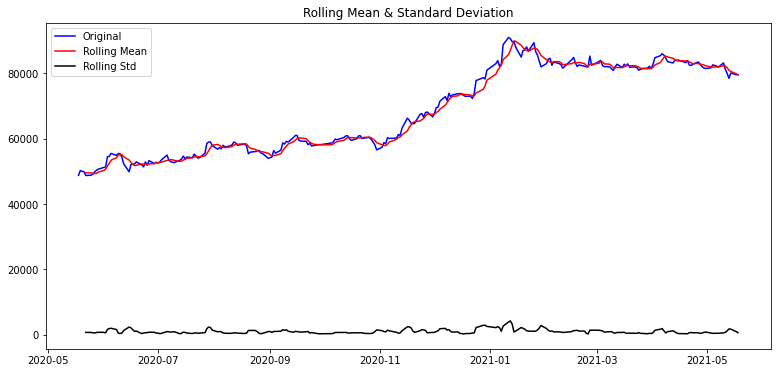

In [13]:
#ÏùºÏ£ºÏùº Íµ¨Í∞Ñ (Í∑ºÎç∞ Ï£ºÎßêÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏùå)
plot_rolling_statistics(ts1, window=5)

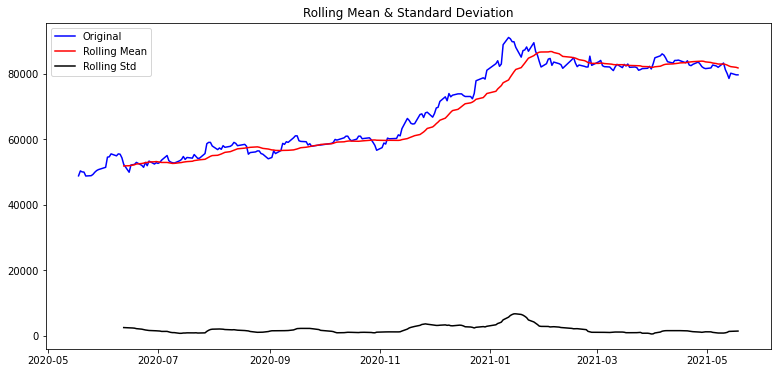

In [14]:
# 4Ï£º (ÌïúÎã¨) Íµ¨Í∞Ñ
plot_rolling_statistics(ts1, window=20)

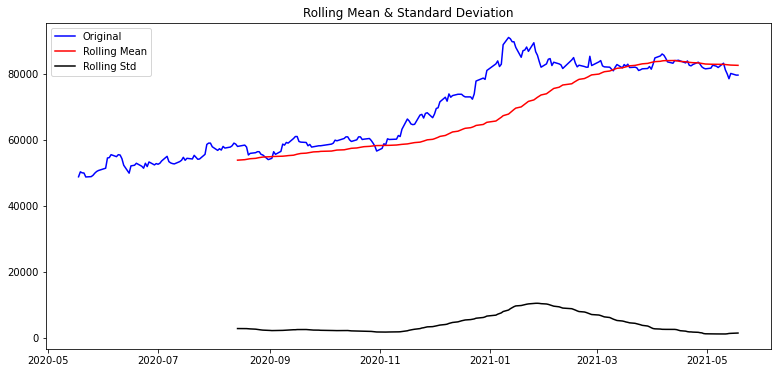

In [15]:
# 3Í∞úÏõî Íµ¨Í∞Ñ 
plot_rolling_statistics(ts1, window=65)

- ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞Ïù¥ Î∂àÏïàÏ†ïÌï¥Î≥¥ÏûÑ  
  -> Ï†ïÏÑ±Ï†Å ÌèâÍ∞Ä ÎßêÍ≥†, Ï†ïÎüâÏ†Å ÌèâÍ∞ÄÎ•º Ìï¥Î≥¥Ïûê  
  
  
### 2. Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test  
= ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÏïàÏ†ïÏÑ±ÏùÑ ÌèâÍ∞ÄÎ≤ï Ï§ë ÌÜµÍ≥ÑÏ†Å Î∞©Î≤ï  

### ‚ë† p-value ÏôÄ ADF test
##### 1) Ìï¥Îãπ ÌÖåÏä§Ìä∏Ïùò step 
  ÏùºÎã® Ïù¥ Îç∞Ïù¥ÌÑ∞ ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§Í≥† Í∞ÄÏ†ï  
  -> ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïù¥ Í∞ÄÏ†ï ÏûÖÏ¶ùÌï¥ÎÇ¥Î†§Í≥† ÎÖ∏Î†•  
  -> ÎÖ∏Î†•ÌïòÎã§Î≥¥Îãà, ÏïàÏ†ïÏ†ÅÏù¥ÎùºÎäî Í≤ÉÏù¥ ÏûÖÏ¶ùÎê®  
  -> ÏïÑÍπå ÎÇ¥Í∞Ä Ìïú Í∞ÄÏ†ï ÌãÄÎ†∏Íµ¨ÎÇò ! ÏïàÏ†ïÏ†ÅÏù∏Í≤å ÎßûÏùå


  Ï£ºÏñ¥ÏßÑ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§ÎùºÎäî Í∑ÄÎ¨¥Í∞ÄÏÑ§(Null Hypothesis)Î•º ÏÑ∏Ïö¥ ÌõÑ  
  -> ÌÜµÍ≥ÑÏ†Å Í∞ÄÏÑ§ Í≤ÄÏ†ï Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ Ïù¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Í∏∞Í∞ÅÎê† Í≤ΩÏö∞  
  -> Ïù¥ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏ†ÅÏù¥Îã§ÎùºÎäî ÎåÄÎ¶ΩÍ∞ÄÏÑ§(Alternative Hypothesis)ÏùÑ Ï±ÑÌÉù  (ADF TestÏùò ÏÑ∏Î∂Ä ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ§Î™Ö : https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)  
  
##### 2)  ÌÜµÍ≥ÑÏ†Å Í∞ÄÏÑ§ Í≤ÄÏ†ïÏùò Í∞úÎ≥∏ Í∞úÎÖê : p-value  
   - = Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïùò Í∞ÄÏ†ïÏù¥ ÎßûÎã§Í≥† Î≥º Ïàò ÏûàÎäî ÌôïÎ•†  
     = Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∞ÄÏ†ïÌñàÏùÑ ÎïåÏùò ÌôïÎ•†Î∂ÑÌè¨ ÏÉÅÏóêÏÑú  
     ÌòÑÏû¨Ïùò Í¥ÄÏ∏°Î≥¥Îã§ Îçî Í∑πÎã®Ï†ÅÏù∏(Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÎÅùÎã®ÎùΩÏóê) Í¥ÄÏ∏°Ïù¥ ÎÇòÏò¨ ÌôïÎ•†  
     
     -> 0.05 ÎØ∏ÎßåÏúºÎ°ú Îß§Ïö∞ ÎÇÆÍ≤å ÎÇòÏò®Îã§Î©¥  
     p-valueÎßåÌÅºÏùò Ïò§Î•ò Í∞ÄÎä•ÏÑ± ÌïòÏóê Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥†  
     ÎåÄÎ¶ΩÍ∞ÄÏÑ§(Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏ†Å)ÏùÑ Ï±ÑÌÉùÌï† Ïàò ÏûàÎäî Í∑ºÍ±∞Í∞Ä Îê®  

##### 3)  statsmodels Ìå®ÌÇ§ÏßÄÏùò adfuller Î©îÏÜåÎìúÎ°ú ÏÜêÏâΩÍ≤å ADF Test Í≤∞Í≥º Ïù¥Ïö©  
   - statsmodels Ìå®ÌÇ§ÏßÄ  
     RÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÌÜµÍ≥ÑÍ≤ÄÏ†ï, ÏãúÍ≥ÑÏó¥Î∂ÑÏÑù Îì±ÏùÑ ÌååÏù¥Ïç¨ÏóêÏÑúÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÍ≤åÌïòÎäî Í∞ïÎ†•Ìïú ÌÜµÍ≥Ñ Ìå®ÌÇ§ÏßÄ
   - adfuller Î©îÏÜåÎìú  
     Ï£ºÏñ¥ÏßÑ timeseriesÏóê ÎåÄÌïú ADF TestÎ•º ÏàòÌñâÌïòÎäî ÏΩîÎìú  
     (ÌÅ¥ÎùºÏö∞ÎìúÏóêÎäî Ïù¥ÎØ∏ ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏùå)  


##### 4)  ADF Test Ìï®Ïàò ÏÉùÏÑ±


In [16]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    
    #AIC(Akaike information criterion)
    #Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ ÏÖãÏóê ÎåÄÌïú ÌÜµÍ≥Ñ Î™®Îç∏Ïùò ÏÉÅÎåÄÏ†ÅÏù∏ ÌíàÏßàÏùÑ ÌèâÍ∞ÄÌïòÎäî Í≤É, ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå  
    #https://m.blog.naver.com/euleekwon/221465294530
    #https://rpago.tistory.com/15
    #https://hongl.tistory.com/98
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÜåÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [17]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.222649
p-value                          0.663778
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


- Test Statistic = Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ  
   ÌÜµÍ≥ÑÏ†Å Í∞ÄÏÑ§Ïùò ÏßÑÏúÑ Ïó¨Î∂ÄÎ•º Í≤ÄÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÌëúÎ≥∏ÏúºÎ°ú Î∂ÄÌÑ∞ Í≥ÑÏÇ∞ÌïòÎäî ÌÜµÍ≥ÑÎüâ  
   
   
- lag = ÏãúÏ∞®  


- Critical Value (x%)   
   Í∑ÄÎ¨¥Í∞ÄÏÑ§ ÏÉÅÌÉúÏóêÏÑú Ìï¥Îãπ ÌôïÎ•†Ïù¥ ÎÇòÏò§Í≤å ÎêòÎäî Í∞í  
   = Test Statistic Í∞íÏù¥ Critical Value Î≥¥Îã§ ÎÇÆÏùÄ Í≤ΩÏö∞  
   Í∑ÄÎ¨¥Í∞ÄÏÑ§ ÌôïÎ•†Ïù¥ ÎÇÆÏùÄ ÏÉÅÌÉú  
   -> p-valueÍ∞Ä ÎÇÆÏùå = Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å  
   
   
- p-value  
  = Í∑ÄÎ¨¥Í∞ÄÏÑ§  
  = ÏãúÍ≥ÑÏó¥Ïù¥ ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§Îäî Í∞ÄÏ†ï  
  -> 1Ïóê Í∞ÄÍπåÏö∞Î©¥, Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å Î™ªÌï®  
  -> 0Ïóê Í∞ÄÍπåÏõåÏïº ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏùå   
  
  
- p-value = 0.590149  
  -> 0Î≥¥Îã§ 1Ïóê Ï°∞Í∏à Îçî Í∞ÄÍπåÏö¥ Í∞í  
  -> ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÏùÄ ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÍ≥† Î≥¥Ïó¨Ïßê  
  

### ‚ë°  Ï∂îÏÑ∏(Trend) ÏÉÅÏáÑÌïòÍ∏∞ <= Moving average Ï†úÍ±∞  
- trend  
  = Ï∂îÏÑ∏  
  = ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏóêÏÑú ÏúÑÏôÄ Í∞ôÏù¥ ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÎÇòÌÉÄÎÇòÎäî ÌèâÍ∑†Í∞í Î≥ÄÌôî  


- Î≥ÄÌôîÎüâ Ï†úÍ±∞ Î∞©Î≤ï  
  -> Moving Average= rolling mean Í±∞Íæ∏Î°ú Íµ¨Ìï¥ÏÑú  
  -> ts_logÏóêÏÑú ÎπºÏ§å  

##### 1)  moving_avg = Íµ¨Í∞Ñ ÌÜµÍ≥ÑÏπò = Íµ¨Í∞Ñ ÌèâÍ∑†Ïπò Íµ¨ÌïòÍ∏∞

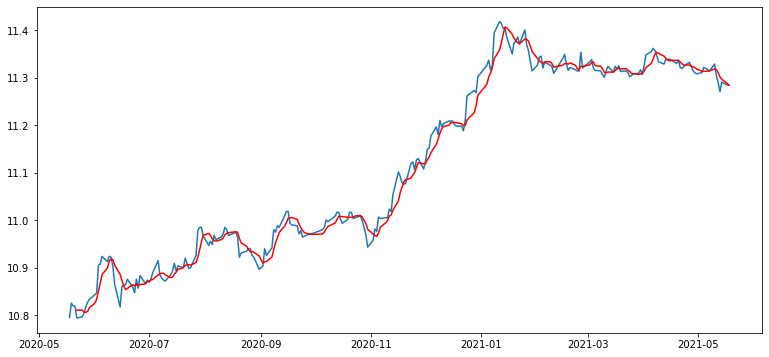

In [18]:
# 5Ïùº Íµ¨Í∞Ñ
moving_avg_5 = ts1_log.rolling(window=5).mean()   
plt.plot(ts1_log)
plt.plot(moving_avg_5, color='red')

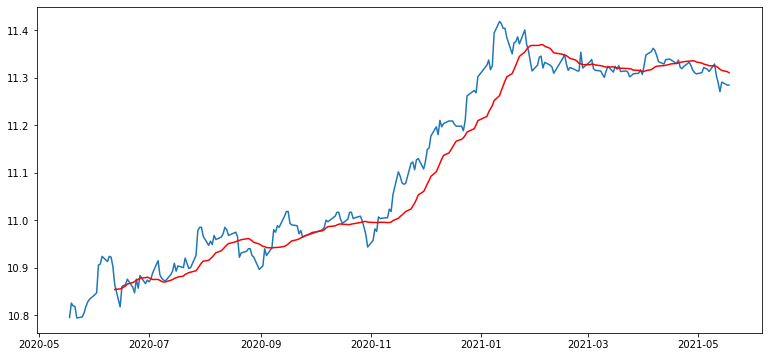

In [19]:
# 4Ï£º(ÌïúÎã¨)Íµ¨Í∞Ñ
moving_avg_20 = ts1_log.rolling(window=20).mean()   
plt.plot(ts1_log)
plt.plot(moving_avg_20, color='red')

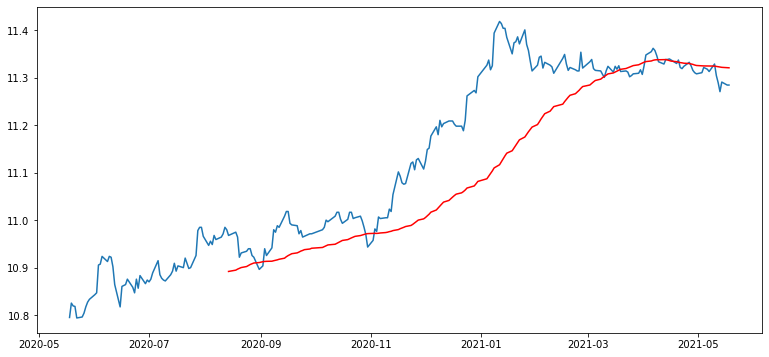

In [20]:
# 3Í∞úÏõî Íµ¨Í∞Ñ
moving_avg_65 = ts1_log.rolling(window=65).mean()   
plt.plot(ts1_log)
plt.plot(moving_avg_65, color='red')

 ##### 2)  moving_avg =    Î≥ÄÌôîÎüâ Ï†úÍ±∞

In [21]:
#5Ïùº Íµ¨Í∞Ñ

# ts_log = ÌèâÍ∑†ÏπòÏóêÏÑú
# moving_avg = Íµ¨Í∞Ñ ÌÜµÍ≥ÑÏπò = Íµ¨Í∞Ñ ÌèâÍ∑†Ïπò = Ìä∏Î†åÎìú =Ï∂îÏÑ∏ = Î≥ÄÌôîÎüâ Ï†úÍ±∞  
ts_log_moving_avg_5 = ts1_log - moving_avg_5
ts_log_moving_avg_5.head(15)

Date
2020-05-18         NaN
2020-05-19         NaN
2020-05-20         NaN
2020-05-21         NaN
2020-05-22   -0.016392
2020-05-25   -0.014548
2020-05-26   -0.002174
2020-05-27    0.011339
2020-05-28    0.019515
2020-05-29    0.017606
2020-06-01    0.018022
2020-06-02    0.013375
2020-06-03    0.054302
2020-06-04    0.040126
2020-06-05    0.038384
Name: Close, dtype: float64

- Íµ¨ÌïòÎ†§Îçò ts_log_moving_avgÍµ¨Ìï®  
  -> Í∑∏Îü∞Îç∞ Î¨∏Ï†úÎäî Moving Average Í≥ÑÏÇ∞ Ïãú (windows size=5Ïù∏ Í≤ΩÏö∞)  
  ÏïûÏùò 64Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îäî Moving AverageÍ∞Ä Í≥ÑÏÇ∞ÎêòÏßÄ ÏïäÏùå  
  -> ts_log_moving_avgÏóê Í≤∞Ï∏°Ïπò(NaN) Î∞úÏÉù  
  -> Ïù¥ Í≤∞Ï∏°ÏπòÎì§ÏùÄ Ìñ•ÌõÑ Dicky-Fuller Test ÏãúÏóê ÏóêÎü¨Î•º Î∞úÏÉùÏãúÌÇ¥  
  -> Ïù¥Î•º Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï†úÍ±∞  
  

In [22]:
# 4Ï£º(20Ïùº) Íµ¨Í∞Ñ
ts_log_moving_avg_20 = ts1_log - moving_avg_20
ts_log_moving_avg_20.head(15)

Date
2020-05-18   NaN
2020-05-19   NaN
2020-05-20   NaN
2020-05-21   NaN
2020-05-22   NaN
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
2020-06-01   NaN
2020-06-02   NaN
2020-06-03   NaN
2020-06-04   NaN
2020-06-05   NaN
Name: Close, dtype: float64

In [23]:
# 3Í∞úÏõî Íµ¨Í∞Ñ
ts_log_moving_avg_65 = ts1_log - moving_avg_65
ts_log_moving_avg_65.head(15)

Date
2020-05-18   NaN
2020-05-19   NaN
2020-05-20   NaN
2020-05-21   NaN
2020-05-22   NaN
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
2020-06-01   NaN
2020-06-02   NaN
2020-06-03   NaN
2020-06-04   NaN
2020-06-05   NaN
Name: Close, dtype: float64

##### 3)Í≤∞Ï∏°Ïπò Ï†úÍ±∞  

In [24]:
# 5Ïùº Íµ¨Í∞Ñ

#dropna : Í≤∞Ï∏°Ïπò Ï†úÍ±∞   
#inplace=True : ÏõêÎ≥∏ÏùÑ ÏàòÏ†ï
ts_log_moving_avg_5.dropna(inplace=True)
ts_log_moving_avg_5.head(15)

Date
2020-05-22   -0.016392
2020-05-25   -0.014548
2020-05-26   -0.002174
2020-05-27    0.011339
2020-05-28    0.019515
2020-05-29    0.017606
2020-06-01    0.018022
2020-06-02    0.013375
2020-06-03    0.054302
2020-06-04    0.040126
2020-06-05    0.038384
2020-06-08    0.013560
2020-06-09    0.009080
2020-06-10    0.004001
2020-06-11   -0.014952
Name: Close, dtype: float64

In [25]:
# 20Ïùº(4Ï£º) Íµ¨Í∞Ñ

ts_log_moving_avg_20.dropna(inplace=True)
ts_log_moving_avg_20.head(15)

Date
2020-06-12    0.010242
2020-06-15   -0.037848
2020-06-16    0.003538
2020-06-17    0.003303
2020-06-18    0.002918
2020-06-19    0.010240
2020-06-22   -0.010044
2020-06-23   -0.023786
2020-06-24    0.002060
2020-06-25   -0.018491
2020-06-26    0.005626
2020-06-29   -0.012562
2020-06-30   -0.006301
2020-07-01   -0.008322
2020-07-02   -0.001053
Name: Close, dtype: float64

In [26]:
#3Í∞úÏõî Íµ¨Í∞Ñ
ts_log_moving_avg_65.dropna(inplace=True)
ts_log_moving_avg_65.head(15)

Date
2020-08-14    0.075817
2020-08-18    0.079927
2020-08-19    0.067461
2020-08-20    0.023474
2020-08-21    0.030728
2020-08-24    0.032139
2020-08-25    0.035261
2020-08-26    0.033175
2020-08-27    0.017225
2020-08-28    0.012167
2020-08-31   -0.014399
2020-09-01   -0.011578
2020-09-02   -0.008768
2020-09-03    0.026810
2020-09-04    0.012245
Name: Close, dtype: float64

- NAN Í∞íÏóÜÍ≥†, Ïù¥Îèô ÌèâÍ∑† Î™®Îëê 0Í≥º Í∞ÄÍπåÏõåÏÑú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î≥ÄÌôîÎüâ Ï†úÍ±∞ÌñàÎã§Í≥† Î≥¥Ïó¨Ïßê 

##### 4) ÏãúÍ∞ÅÌôîÎ°ú Ï†ïÏÑ±Ï†Å ÌèâÍ∞Ä

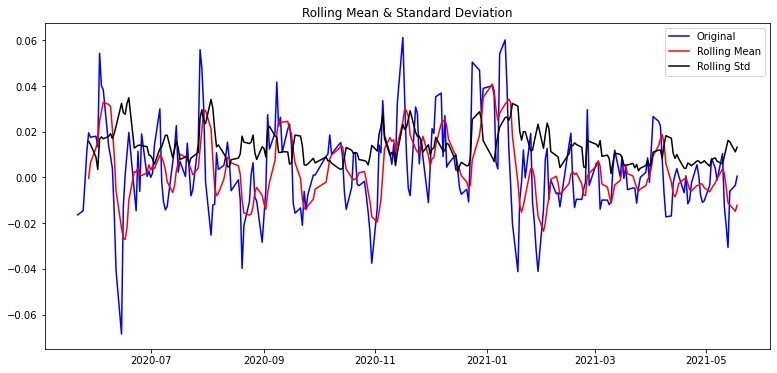

In [27]:
# 5Ïùº Íµ¨Í∞Ñ
plot_rolling_statistics(ts_log_moving_avg_5,window=5)

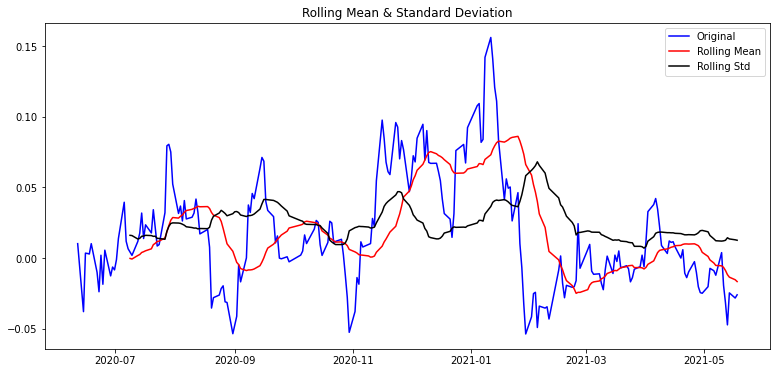

In [28]:
# 20Ïùº Íµ¨Í∞Ñ
plot_rolling_statistics(ts_log_moving_avg_20,window=20)

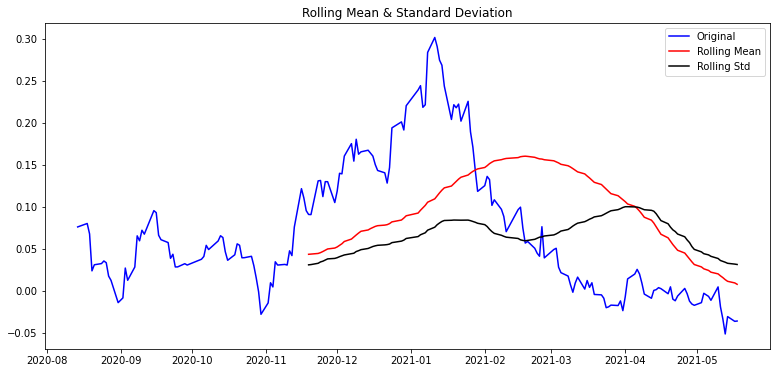

In [29]:
# 3Í∞úÏõî Íµ¨Í∞Ñ
plot_rolling_statistics(ts_log_moving_avg_65,window=65)

##### 5) ADF test

In [30]:
#5Ïùº Íµ¨Í∞Ñ
augmented_dickey_fuller_test(ts_log_moving_avg_5)

Results of Dickey-Fuller Test:
Test Statistic                -7.801633e+00
p-value                        7.466367e-12
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


In [31]:
#20Ïùº Íµ¨Í∞Ñ
augmented_dickey_fuller_test(ts_log_moving_avg_20)

Results of Dickey-Fuller Test:
Test Statistic                  -3.103759
p-value                          0.026276
#Lags Used                       0.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


In [32]:
#3Í∞úÏõî Íµ¨Í∞Ñ
augmented_dickey_fuller_test(ts_log_moving_avg_65)

Results of Dickey-Fuller Test:
Test Statistic                  -1.097313
p-value                          0.716142
#Lags Used                       0.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64


- **5Ïùº, 3Í∞úÏõî Íµ¨Í∞Ñ**  
  p-value Í∞íÏù¥ 5Ïùº, 3Í∞úÏõî Íµ¨Í∞ÑÏùº ÎïåÎäî ÎÑàÎ¨¥ ÎÜíÏùå  
  ->  p-value = ÏãúÍ≥ÑÏó¥Ïù¥ ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Í∏∞Í∞ÅÎêòÏßÄ ÏïäÏùå  
  -> **ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥ ÏïÑÎãò**  
  
  
- **20Ïùº Íµ¨Í∞Ñ**
  p-value= 0.026276 : ÎπÑÍµêÏ†Å ÎÇÆÏùå  
  -> p-value = ÏãúÍ≥ÑÏó¥Ïù¥ ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Í∏∞Í∞Å  
  -> **ÏïàÏ†ïÏ†Å ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÍ≥† ÌåêÎã®**
  **Ï¶â 20Ïùº Íµ¨Í∞Ñ (=window=20)ÏùºÎïå Ï£ºÍ∏∞ÏÑ±ÏùÑ Í∞ÄÏßê**
  
  
- avg vs mean  
    avgÎäî Ï†ÑÏ≤¥ ÏÉòÌîå ÌèâÍ∑†  
    meanÏùÄ Î∂ÄÎ∂ÑÏßëÌï© or Ï†ÑÏ≤¥ ÏÉòÌîå ÌèâÍ∑†  
    -> "moving averageÎ•º Í≥†Î†§Ìï† ÎïåÎäî rolling meanÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌïú"  
    -> Î∂ÄÎ∂ÑÏßëÌï© mean ÏùÑ Íµ¨Ìï¥ÏÑú avgÎ•º Í≥†Î†§ÌïòÎäî Í≤É  
    -> moving_avg = ts_log.rolling(window=12).mean() ÏΩîÎìúÎ≥¥Î©¥ Îçî ÏßÅÍ¥ÄÏ†ÅÏûÑ

### ‚ë¢ Ï∞®Î∂Ñ(Differencing) - Í≥ÑÏ†àÏÑ±(Seasonality) ÏÉÅÏáÑÌïòÍ∏∞  

- Í≥ÑÏ†àÏ†Å/Ï£ºÍ∏∞Ï†Å Ìå®ÌÑ¥  
  = Í≥ÑÏ†àÏÑ±(Seasonality)  
  = ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÏïàÏóê Ìè¨Ìï®Îêú Ìå®ÌÑ¥Ïù¥ ÌååÏïÖÎêòÏßÄ ÏïäÏùÄ Ï£ºÍ∏∞Ï†Å Î≥ÄÌôî  
  -> trendÏóêÎäî Ìè¨Ìï®ÎêòÏßÄ Î™ªÌï®  
  -> Í∑∏Îü¨ÎÇò ÏòàÏ∏°Ïóê Î∞©Ìï¥ÎêòÎäî Î∂àÏïàÏ†ïÏÑ± ÏöîÏÜå  
  (ÏãúÍ≥ÑÏó¥ Ìå®ÌÑ¥ : https://otexts.com/fppkr/tspatterns.html)  
  
  
- Ï∞®Î∂Ñ(Differencing)  
  = Í≥ÑÏ†àÏ†Å/Ï£ºÍ∏∞Ï†Å Ìå®ÌÑ¥ÏùÑ ÏÉÅÏáÑÌïòÍ∏∞ ÏúÑÌï¥ Ìö®Í≥ºÏ†ÅÏù∏ Î∞©Î≤ï  
  = ÏõêÎûò ÏãúÍ≥ÑÏó¥ - Ìïú Ïä§ÌÖù ÏïûÏúºÎ°ú ÏãúÌîÑÌä∏Ìïú ÏãúÍ≥ÑÏó¥  
  = Ïù¥Î≤à Ïä§ÌÖùÏóêÏÑú Î∞úÏÉùÌïú Î≥ÄÌôîÎüâ ÏùòÎØ∏  
  
##### 1) ÏãúÌîÑÌä∏Ìïú ÏãúÍ≥ÑÏó¥ , ÏõêÎ≥∏ ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞

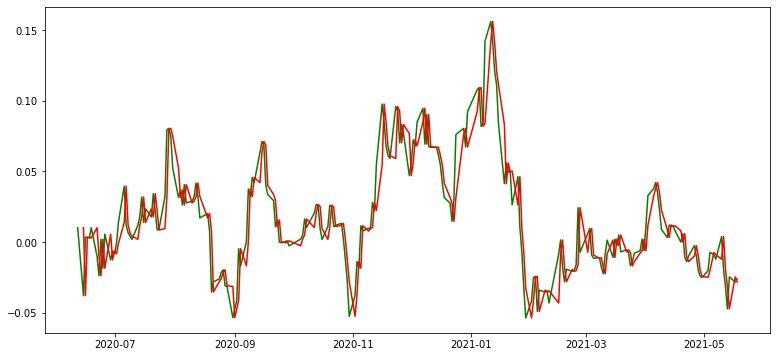

In [33]:
ts_log_moving_avg_shift = ts_log_moving_avg_20.shift()

plt.plot(ts_log_moving_avg_20, color='green')
plt.plot(ts_log_moving_avg_shift, color='red')

##### 2) ÏõêÎ≥∏ ÏãúÍ≥ÑÏó¥ - ÏãúÌîÑÌä∏Ìïú ÏãúÍ≥ÑÏó¥ Í∞í Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑ  

ts_log_moving_avg_diff  
= ÏõêÎ≥∏ - ÏãúÌîÑÌä∏ Í∞í 
= ÏõêÎ≥∏Í≥º ÏãúÌîÑÌä∏Ïùò Ï∞®Ïù¥  
= ÌïòÎ£®Îãπ Î≥ÄÌôîÎüâ (Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî ÌïòÎ£®ÎßàÎã§ Îç∞Ïù¥ÌÑ∞Í∞Ä Íµ¨Ï∂ïÎêòÏñ¥ÏûàÏùå)  

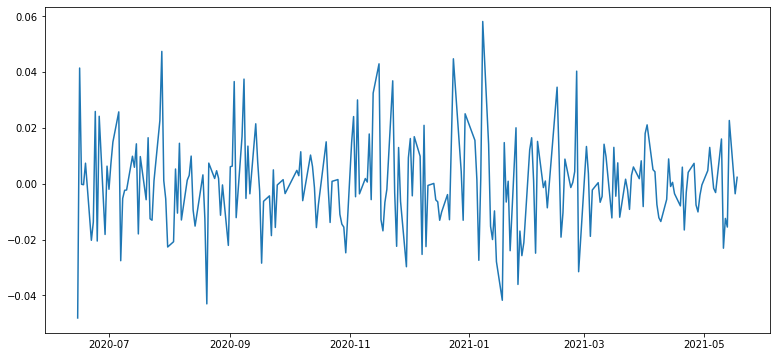

In [34]:
ts_log_moving_avg_diff = ts_log_moving_avg_20 - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

##### 3) Ïù¥Îèô ÌèâÍ∑†/ÌëúÏ§ÄÌé∏Ï∞® Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑ  

Ï†ïÏÑ±Ï†ÅÏúºÎ°ú ÏïàÏ†ïÏÑ±(stationary) Ïó¨Î∂Ä ÌååÏïÖ

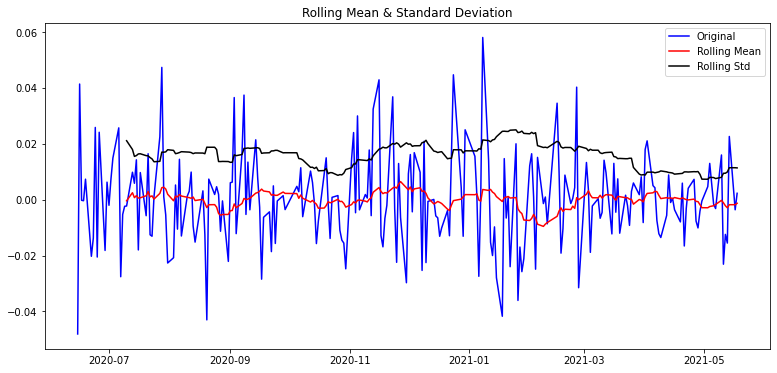

In [35]:
plot_rolling_statistics(ts_log_moving_avg_diff,window=20)

##### 4) Ï∞®Î∂Ñ Ï†ÅÏö©Îêú ADF test ÏßÑÌñâ

In [36]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.583380e+01
p-value                        9.872810e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


- Ï∂îÏÑ∏=Trend Ï†úÍ±∞(=Ïù¥ÎèôÌèâÍ∑† Î∫Ä)Ìïú ÎÇú ÏãúÍ≥ÑÏó¥Ïóê  
  -> 1Ï∞® Ï∞®Î∂Ñ(1st order differencing)ÏùÑ Ï†ÅÏö©  
  -> Í≥ÑÏ†àÏÑ± =Seasonality Ìö®Í≥º Îã§ÏÜå ÏÉÅÏáÑ  
  -> p-value =0.022 -> 0.0019 : 1/10 Ï†ïÎèÑÎ°ú Ï§ÑÏñ¥Îì¶  
  (2Ï∞® Ï∞®Î∂Ñ. 3Ï∞® Ï∞®Î∂Ñ ÏßÑÌñâÌïòÎ©¥ Îçî p-value ÎÇÆÏ∂ú Ïàò ÏûàÏùÑÍ≤ÉÏúºÎ°ú Í∏∞ÎåÄ)  
  
  
- Ï∞®Î∂ÑÏùò Ï∞®Ïàò  
  1Ï∞® Ï∞®Î∂Ñ = [x(t) ‚Äì x(t-1)]  
  (d=1)ÏùÄ ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïù¥  
  
  2Ï∞® Ï∞®Î∂Ñ = [{x(t) ‚Äì x(t-1)} ‚Äì {x(t-1) ‚Äì x(t-2)}]  
  (d=2)ÏùÄ 1Ï∞® Ï∞®Î∂Ñ ÏãúÍ≥ÑÏó¥ÏùÑ ÌïúÎ≤à Îçî Ï∞®Î∂ÑÌïú Í≤É
  
  Ï†ïÏàò Ï∞®ÏõêÏùò Ï∞®Î∂Ñ ÏãúÍ≥ÑÏó¥ÏùÄ stationaryÌïú ÌäπÏßïÏù¥ ÏûàÏùå  
  Í∑∏Îü¨ÎÇò Ïõê ÏãúÍ≥ÑÏó¥Ïù¥ Í∞ÄÏßÄÍ≥† ÏûàÎäî Î©îÎ™®Î¶¨Î•º ÏßÄÏõå Î≤ÑÎ¶º  
  Ï∞®Î∂Ñ ÏãúÍ≥ÑÏó¥ÏùÑ Îã§Ïãú ÎàÑÏ†ÅÌïòÎ©¥ Ïõê ÏãúÍ≥ÑÏó¥Î°ú Î≥µÏõê ->Î©îÎ™®Î¶¨ÎèÑ Îã§Ïãú Î≥µÏõê  
  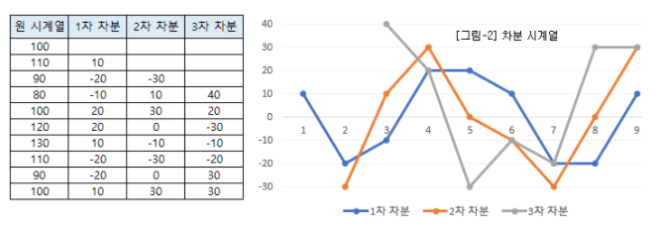 
  https://m.blog.naver.com/chunjein/222071363797  

### 3. ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time series decomposition)

In [37]:
ts1_log

Date
2020-05-18    10.795486
2020-05-19    10.825760
2020-05-20    10.819778
2020-05-21    10.818778
2020-05-22    10.794460
                ...    
2021-05-12    11.289782
2021-05-13    11.270854
2021-05-14    11.291031
2021-05-17    11.284769
2021-05-18    11.284769
Name: Close, Length: 250, dtype: float64

In [38]:
type(ts1_log.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [39]:
ts1[ts1.isna()] 

Series([], Name: Close, dtype: float64)

- statsmodels ÎùºÏù¥Î∏åÎü¨Î¶¨ ÎÇ¥  
  seasonal_decompose Î©îÏÜåÎìú  
  -> ÏãúÍ≥ÑÏó¥ ÏïàÏóê Ï°¥Ïû¨ÌïòÎäî trend, seasonalityÎ•º ÏßÅÏ†ë Î∂ÑÎ¶¨Ìï† Ïàò ÏûàÎäî Í∏∞Îä• ÏûàÏùå  
  -> moving average Ï†úÍ±∞, differencing Îì±ÏùÑ Í±∞ÏπòÏßÄ ÏïäÍ≥†ÎèÑ Ìõ®Ïî¨ ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥ÏùÑ Î∂ÑÎ¶¨ Í∞ÄÎä•  

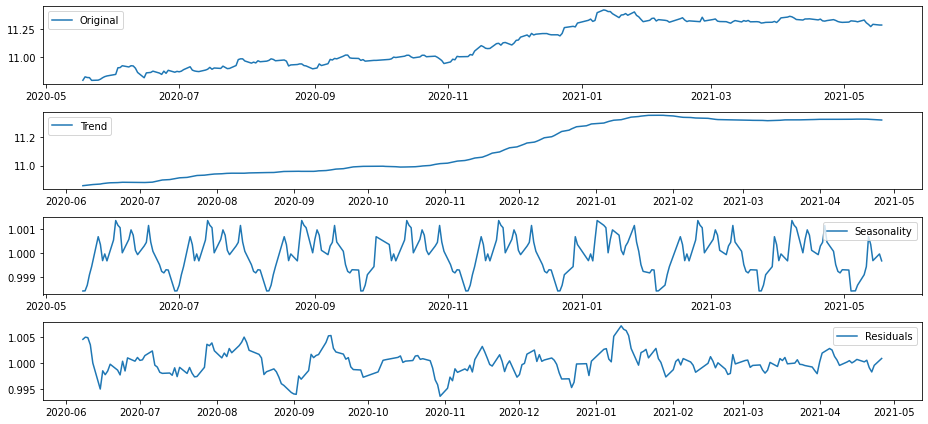

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts1_log, model='multiplicative', period = 30)

trend = decomposition.trend # Ï∂îÏÑ∏(ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÎÇòÌÉÄÎÇòÎäî ÌèâÍ∑†Í∞í Î≥ÄÌôî )
seasonal = decomposition.seasonal # Í≥ÑÏ†àÏÑ±(Ìå®ÌÑ¥Ïù¥ ÌååÏïÖÎêòÏßÄ ÏïäÏùÄ Ï£ºÍ∏∞Ï†Å Î≥ÄÌôî)
residual = decomposition.resid # ÏõêÎ≥∏(Î°úÍ∑∏Î≥ÄÌôòÌïú) - Ï∂îÏÑ∏ - Í≥ÑÏ†àÏÑ±

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

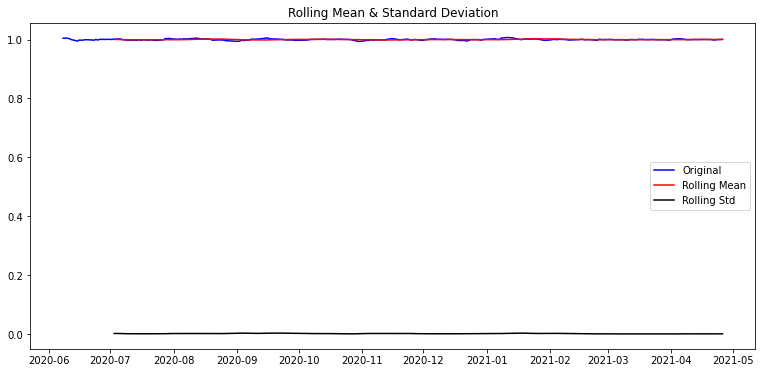

In [41]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual, window=20)

### 4. Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏  

In [42]:
residual.isna().sum()

30

In [43]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


- p-value= 6.234854e-08Î°ú
  Ï∞®Î∂Ñ ÏßÑÌñâÎ≥¥Îã§Îäî Ï°∞Í∏à Îçî Í∞êÏÜåÌï®  
  Í∑∏Îü¨ÎÇò Ï∞®Î∂Ñ Îçî ÏßÑÌñâÌï¥ÏÑú Í∞êÏÜåÌï¥ÏïºÌï† ÌïÑÏöîÏÑ± ÏûàÏùå  

### STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±  

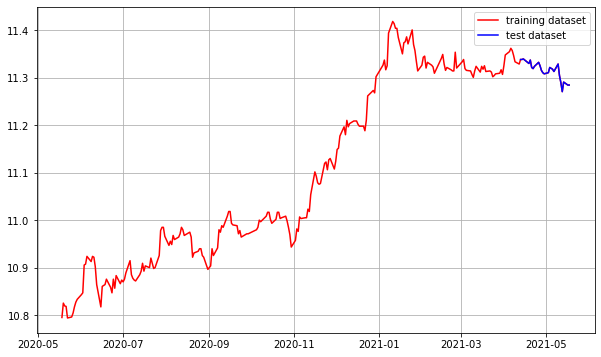

In [44]:
train_data, test_data = ts1_log[:int(len(ts1_log)*0.9)], ts1_log[int(len(ts1_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts1_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞  


### ‚ë† ARIMA Î™®Îç∏Ïùò Î™®Ïàò(ÌååÎùºÎØ∏ÌÑ∞)  p, q, d  
- ARIMA Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌôúÏö©ÌïòÎ†§Î©¥  
  <- ARIMAÏùò Î™®Ïàò(parameter)Î•º Ïûò ÏÑ§Ï†ïÌï¥ÏïºÌï®  
  

#### 1. ARIMA Ïùò Î™®Ïàò 3Í∞ÄÏßÄ  
  1) p : ÏûêÍ∏∞ÌöåÍ∑Ä Î™®Ìòï(AR)Ïùò ÏãúÏ∞® = Íµ¨Í∞Ñ 1Í≥º 2Ïùò Ï∞®Ïù¥= Î≥ÄÌôîÎüâ  
  2) q : Ïù¥ÎèôÌèâÍ∑† Î™®Ìòï(MA)Ïùò ÏãúÏ∞®  
  3) d : Ï∞®Î∂ÑÎàÑÏ†Å(I) ÌöüÏàò  
  
  -> ÏùºÎ∞òÏ†ÅÏúºÎ°ú p + q < 2, p * q = 0 ÏÇ¨Ïö©  
     p or q =0 Ïù¥ÎùºÎäî Îúª  
  -> ÎßéÏùÄ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä AR ÎòêÎäî MA Ï§ë ÌïòÎÇòÏùò Í≤ΩÌñ•Îßå Í∞ÄÏßÄÍ∏∞ ÎïåÎ¨∏  
  
  
#### 2. Î™®Ïàò p,q,dÏùò Í≤∞Ï†ï Î∞©Î≤ï  
 - ÌÜµÍ≥ÑÌïôÏ†ÅÏù∏ ÎßéÏùÄ ÏãúÎèÑÍ∞Ä ÏûàÏóàÎäîÎç∞  
    -> ÎåÄÌëúÏ†ÅÏù∏ Î∞©Î≤ï : ACF(Autocorrelation Function)ÏôÄ  
    PACF(Partial Autocorrelation Function)  

  - **1) ACF**  
    - Îß® Ï≤´ Ïä§ÌÖùÏóêÏÑú Ïö∞Î¶¨Í∞Ä Îã§Î£¨ Í∞úÎÖêÏ§ë ÌïòÎÇòÏù∏ ÏûêÍ∏∞ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ Í∞ôÏùÄ Í≤É  
    - ÏãúÏ∞®(lag)Ïóê Îî∞Î•∏ Í¥ÄÏ∏°ÏπòÎì§ ÏÇ¨Ïù¥Ïùò Í¥ÄÎ†®ÏÑ±ÏùÑ Ï∏°Ï†ïÌïòÎäî Ìï®Ïàò  
    - Ï£ºÏñ¥ÏßÑ ÏãúÍ≥ÑÏó¥Ïùò ÌòÑÏû¨ Í∞íÏù¥ Í≥ºÍ±∞(yt‚àí1‚Äã ,yt‚àí2‚Äã ,....,yt‚àín‚Äã)Í∞íÍ≥º Ïñ¥ÎñªÍ≤å ÏÉÅÍ¥ÄÎêòÎäîÏßÄ ÏÑ§Î™ÖÌï®  
    - ACF plotÏóêÏÑú xÏ∂ï= ÏÉÅÍ¥ÄÍ≥ÑÏàò, yÏ∂ï= ÏãúÏ∞® Ïàò  
  - **2) PACF**  
    - Îã§Î•∏ Í¥ÄÏ∏°ÏπòÏùò ÏòÅÌñ•Î†•ÏùÑ Î∞∞Ï†úÌïòÍ≥†  
      Îëê ÏãúÏ∞®Ïùò Í¥ÄÏ∏°Ïπò Í∞Ñ Í¥ÄÎ†®ÏÑ±ÏùÑ Ï∏°Ï†ïÌïòÎäî Ìï®Ïàò  
    - K Ïô∏ Î™®Îì† ÏãúÏ∞®Î•º Í∞ñÎäî Í¥ÄÏ∏°Ïπò(yt‚àí1‚Äã ,yt‚àí2‚Äã ,....,yt‚àík+1‚Äã)Ïùò ÏòÅÌñ•Î†•ÏùÑ Î∞∞Ï†úÌïòÍ≥†  
      Ïù¥ Ï§ë Îëê Í¥ÄÏ∏°Ïπò ytÏôÄ yt-kÍ∞Ä ÏñºÎßàÎÇò Í¥ÄÎ†®ÏûàÎäîÏßÄ ÎÇòÌÉÄÎÇ¥Îäî Ï≤ôÎèÑ  
    

#### 3. Ï∞∏Í≥†ÏûêÎ£å  
  [ÏûêÍ∏∞ÏÉÅÍ¥ÄÌï®Ïàò Î∞è Ìé∏ÏûêÍ∏∞ÏÉÅÍ¥ÄÌï®Ïàò](http://kanggc.iptime.org/em/chap9/chap9.pdf)  
  [A Gentle Introduction to Autocorrelation and Partial Autocorrelation](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)  
  

### ‚ë°  ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞  

ACFÎ•º ÌÜµÌï¥ MA Î™®Îç∏Ïùò ÏãúÏ∞® qÎ•º Í≤∞Ï†ï  
PACFÎ•º ÌÜµÌï¥ AR Î™®Îç∏Ïùò ÏãúÏ∞® pÎ•º Í≤∞Ï†ï  
-> ACFÎäî pÎ•º Îî∞Î•¥ÎãàÍπå qÏùò ÏòÅÌñ•ÏùÑ Î∞õÎäîÍ±∞Í≥†  
-> PACFÎäî qÎ•º Îî∞Î•¥ÎãàÍπå pÏùò ÏòÅÌñ•ÏùÑ Î∞õÎäîÍ±∞Í≥†  

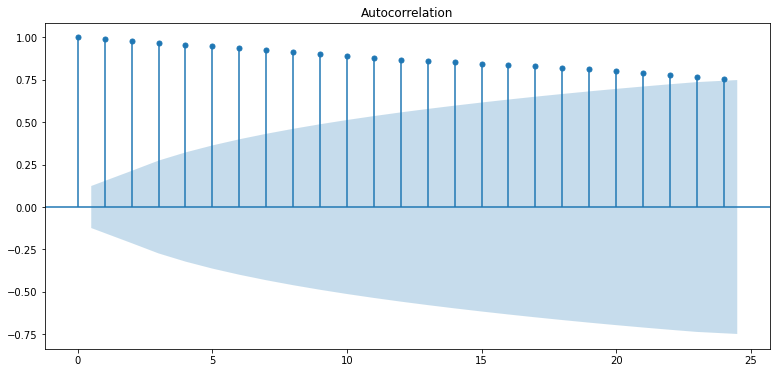

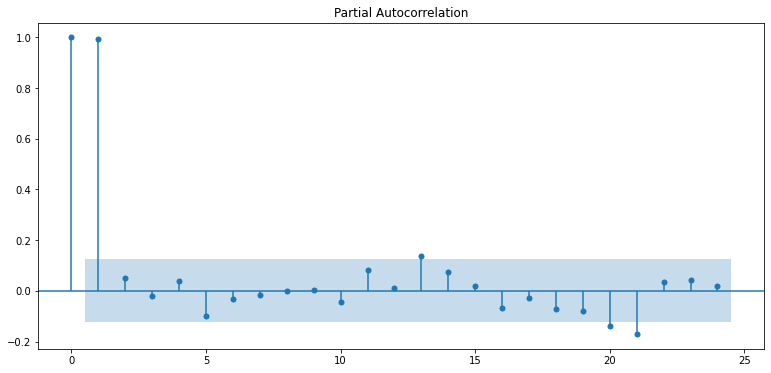

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts1_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts1_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


  - PACF Í∑∏ÎûòÌîÑ Î≥ºÎïå p=1 ÏùºÎïå Îß§Ïö∞ Ï†ÅÌï©  
    <- p >= 2 Íµ¨Í∞ÑÏóêÏÑúÎäî PACFÍ∞Ä Í±∞Ïùò 0Ïóê Í∞ÄÍπåÏõåÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏  
    -> PACF =0 Ïù¥ÎùºÎäî ÏùòÎØ∏Îäî  
    ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏôÄ pÏãúÏ†ê Îñ®Ïñ¥ÏßÑ Ïù¥Ï†ÑÏùò Îç∞Ïù¥ÌÑ∞ ÏÉÅÍ¥ÄÎèÑ =0  
    Ï¶â, ÏïÑÎ¨¥ÏÉÅÍ¥Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ÎãàÍπå Í≥†Î†§Ìï† ÌïÑÏöî ÏóÜÎã§Îäî Í≤É  
    
    
  - ACFÎäî Ï†êÏ∞®Ï†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ≥† ÏûàÏùå  
    -> AR(1) Î™®Îç∏Ïóê Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ•º Î≥¥Ïù¥Í≥† ÏûàÎäî Í≤É  
    
    qÏóê ÎåÄÌï¥ Ï†ÅÌï©Ìïú Í∞íÏù¥ ÏóÜÏñ¥ Î≥¥ÏûÑ  
    -> MA Í≥†Î†§Ìï† ÌïÑÏöî ÏóÜÏúºÎ©¥ q=0ÏúºÎ°ú Îëò Ïàò ÏûàÏùå  
    -> ÏïÑÎãàÎ©¥ q Î∞îÍøî Í∞ÄÎ©∞ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ 
    
    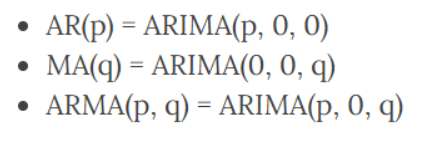


### ‚ë¢ Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞  

In [ ]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts1_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


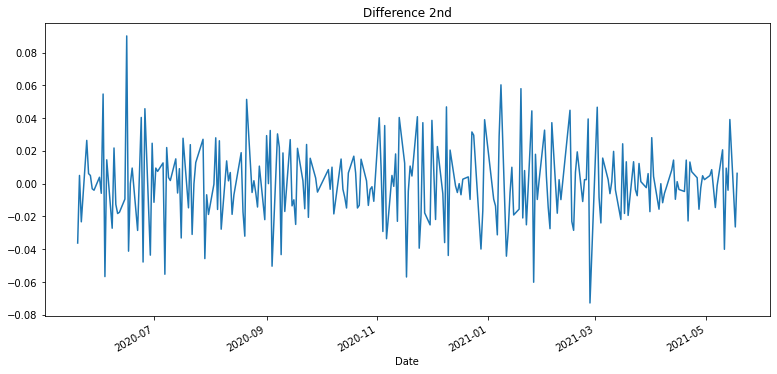

In [47]:
# 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- 2Ï∞® Ï∞®Î∂ÑÏù¥ Îçî ÎÇÆÏùÄ p-value Í∞íÏùÑ Í∞ÄÏßê  
  1Ï∞® Ï∞®Î∂ÑÎßå ÏßÑÌñâÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùÑ Í≤É Í∞ôÏùå  

### STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏  

### ‚ë† p= 1, d= 1, q= 0

#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [51]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

# p= 1, d= 1, q= 0

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 585.396
Method:                       css-mle   S.D. of innovations              0.018
Date:                Fri, 19 Nov 2021   AIC                          -1164.792
Time:                        20:10:19   BIC                          -1154.557
Sample:                             1   HQIC                         -1160.661
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      1.978      0.048    2.17e-05       0.005
ar.L1.D.Close     0.0168      0.067      0.250      0.803      -0.115       0.148
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

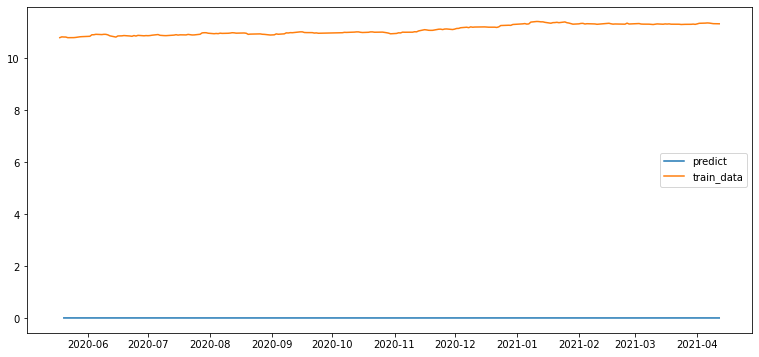

In [53]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

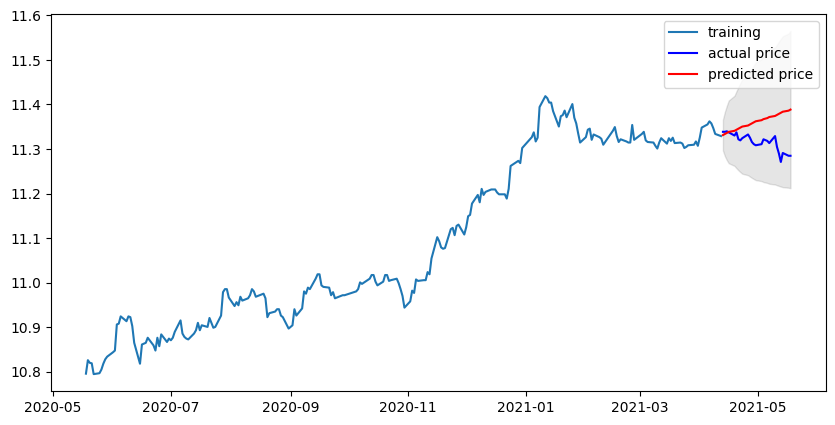

In [52]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  22087366.126154922
MAE:  3791.3511527213127
RMSE:  4699.719792301976
MAPE: 4.68%


### ‚ë° p= 1, d= 2, q= 0

#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [73]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 2, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  223
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 535.977
Method:                       css-mle   S.D. of innovations              0.022
Date:                Fri, 19 Nov 2021   AIC                          -1065.954
Time:                        20:23:53   BIC                          -1055.732
Sample:                             2   HQIC                         -1061.827
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0001      0.001     -0.118      0.906      -0.002       0.002
ar.L1.D2.Close    -0.4759      0.059     -8.067      0.000      -0.591      -0.360
                                    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

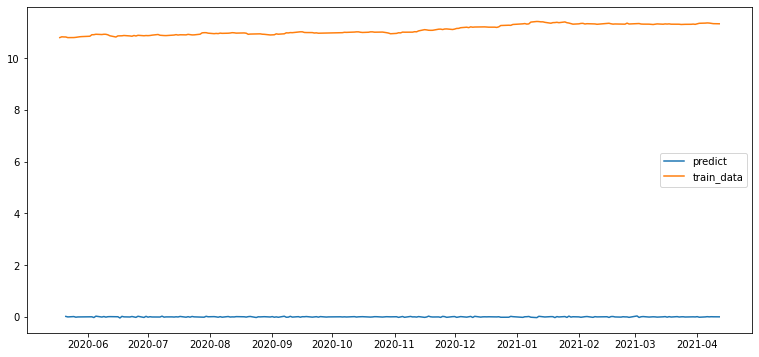

In [56]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

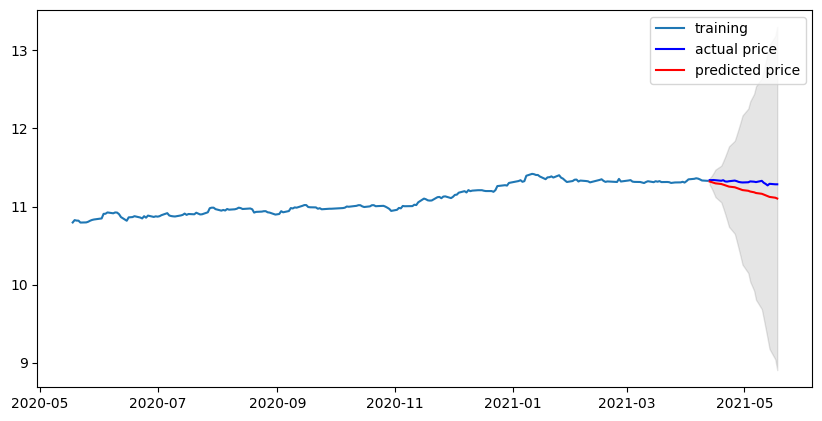

In [74]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  70754398.26831636
MAE:  7601.062623954185
RMSE:  8411.563366480475
MAPE: 9.32%


### ‚ë¢ p= 1, d= 0, q= 0
#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [76]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  225
Model:                     ARMA(1, 0)   Log Likelihood                 583.467
Method:                       css-mle   S.D. of innovations              0.018
Date:                Fri, 19 Nov 2021   AIC                          -1160.933
Time:                        20:23:59   BIC                          -1150.685
Sample:                             0   HQIC                         -1156.797
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.0688      0.210     52.701      0.000      10.657      11.480
ar.L1.Close     0.9972      0.003    298.854      0.000       0.991       1.004
                                    Roots       

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

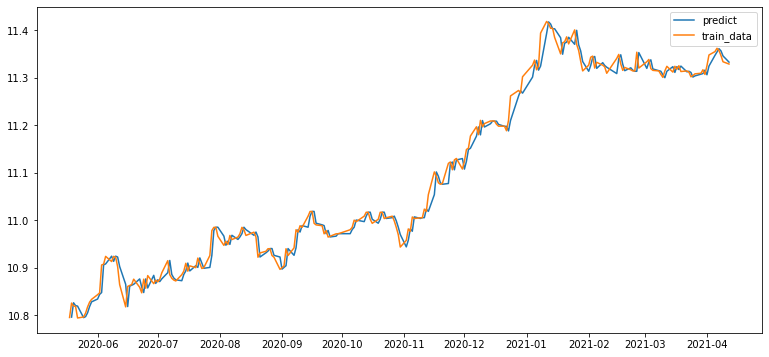

In [59]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

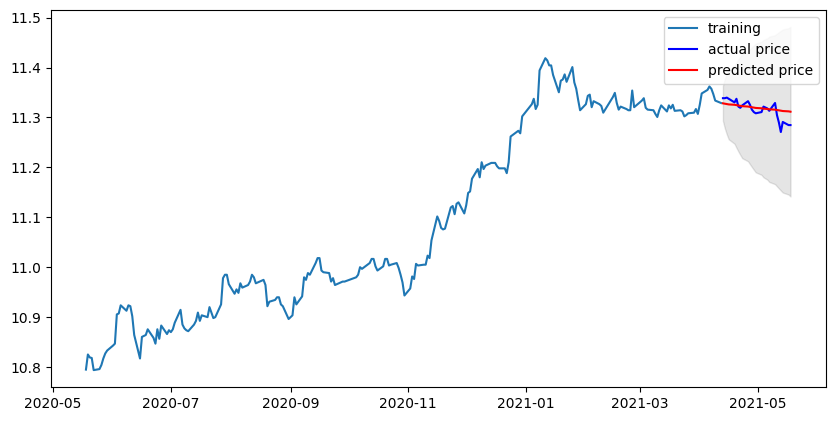

In [77]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1533430.4832786121
MAE:  957.802482046241
RMSE:  1238.3176019416878
MAPE: 1.18%


### ‚ë£ p= 0, d= 1, q= 1
#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [79]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(0, 1, 1))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 585.398
Method:                       css-mle   S.D. of innovations              0.018
Date:                Fri, 19 Nov 2021   AIC                          -1164.796
Time:                        20:24:06   BIC                          -1154.561
Sample:                             1   HQIC                         -1160.664
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      1.977      0.048    2.02e-05       0.005
ma.L1.D.Close     0.0177      0.069      0.257      0.797      -0.117       0.153
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

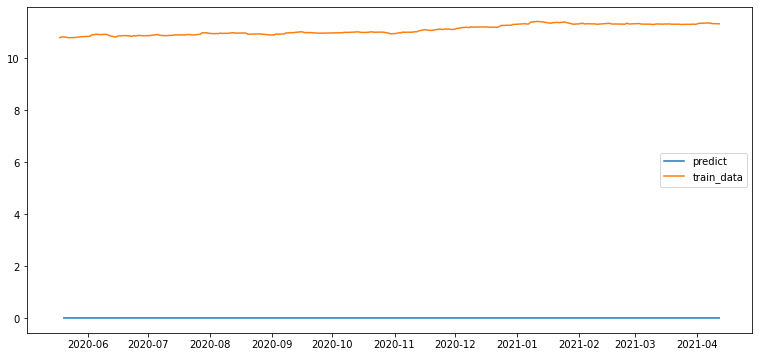

In [62]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

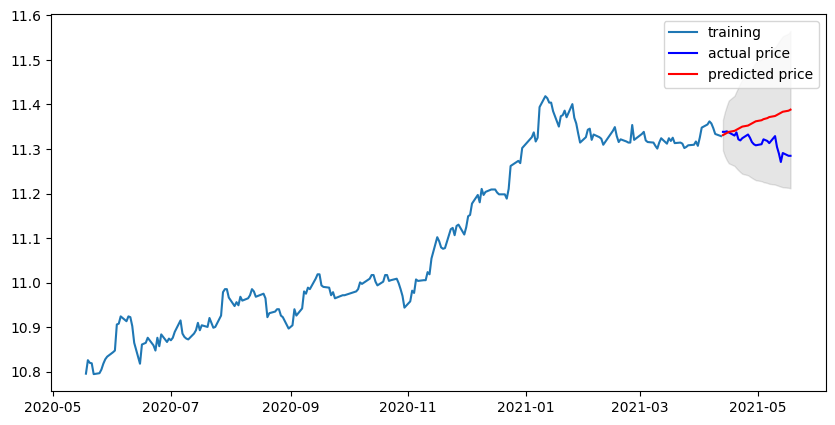

In [80]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  22088457.65325718
MAE:  3791.4564135901687
RMSE:  4699.835917695125
MAPE: 4.68%


### STEP 7 ÌïôÏäµ Í≤∞Î°†  
-
-

-----
### [ÎπÑÌä∏ÏΩîÏù∏ Ï£ºÍ∞Ä]
[BTC-USD](https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD)

### STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ  
- ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume

- ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

- Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©  


#### 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [131]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/BTC-USD.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

ts = df['Close']

print(type(ts))
ts.head(10)

<class 'pandas.core.series.Series'>


Date
2020-11-19    17817.089844
2020-11-20    18621.314453
2020-11-21    18642.232422
2020-11-22    18370.001953
2020-11-23    18364.121094
2020-11-24    19107.464844
2020-11-25    18732.121094
2020-11-26    17150.623047
2020-11-27    17108.402344
2020-11-28    17717.414063
Name: Close, dtype: float64

### STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ  

#### 1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [132]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

Series([], Name: Close, dtype: float64)

- Í≤∞Ï∏°Ïπò ÏóÜÏùå  

#### 2. Î°úÍ∑∏ Î≥ÄÌôò
- Ïö∞Î¶¨Îäî Ïï†Ï¥àÏóê Ïù¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ ÏÑ∏ÏõÄ  
  Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê ÏïàÏ†ïÏ†ÅÏù∏(Stationary) Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µÌï¥ÏïºÌï®  
  
  
- ÏãúÍ∞ÑÏ∂îÏù¥Ïóê Îî∞Îùº Î∂ÑÏÇ∞Ïù¥ Ï†êÏ†ê Ïª§ÏßÄÍ≥† ÏûàÏùÑ Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê  
  Î°úÍ∑∏Ìï®ÏàòÎ°ú Î≥ÄÌôòÌï¥ÏÑú ÏãúÍ∞ÑÏ∂îÏù¥Ïóê Îî∞Î•∏ Î∂ÑÏÇ∞ÏùÑ ÏùºÏ†ïÌïòÍ≤å ÎßåÎì¶  

In [133]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

### STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù  

#### 1. Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù

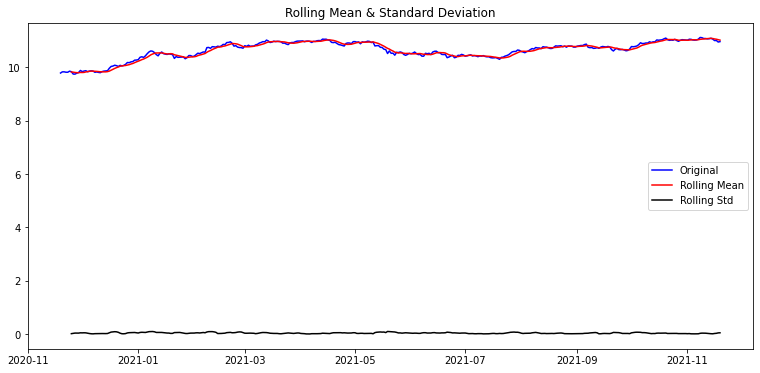

In [134]:
plot_rolling_statistics(ts_log, window=7)

#### 2. Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test

In [135]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -2.366470
p-value                          0.151425
#Lags Used                       0.000000
Number of Observations Used    365.000000
Critical Value (1%)             -3.448394
Critical Value (5%)             -2.869491
Critical Value (10%)            -2.571006
dtype: float64


 - p-value= 0.151425 ÎÇÆÏùÄ ÏàòÏπòÎùºÍ≥† ÌåêÎã®Îê®  
   -> Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å  
   -> Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ ÏïàÏ†ïÏ†Å  

#### 3. ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥  

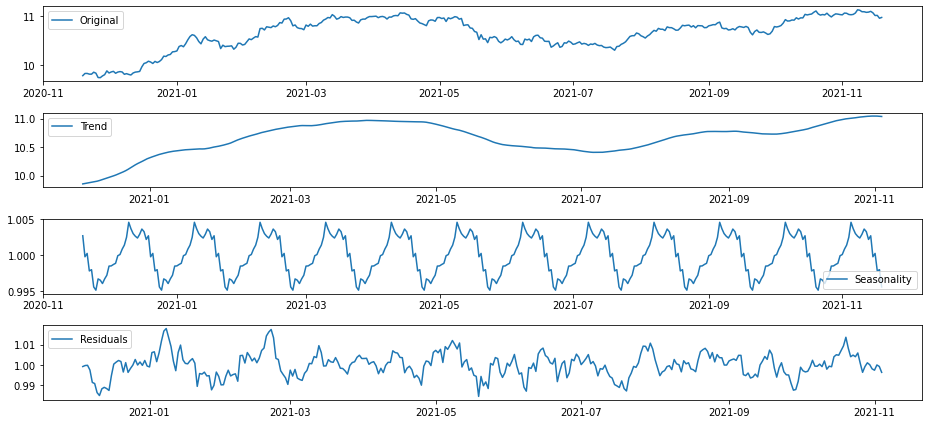

In [136]:
#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


#### 4. Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏  

In [137]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.231541e+00
p-value                        4.939635e-08
#Lags Used                     0.000000e+00
Number of Observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64


- p-value Í∞í Ï¶ùÍ∞ÄÌñàÏßÄÎßå, Ï∞®Î∂Ñ ÏßÑÌñâÌïòÎ©¥ÏÑú ÎÇÆÏïÑÏßà Í≤ÉÏúºÎ°ú Í∏∞ÎåÄ  

### STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±  

#### 1. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨  

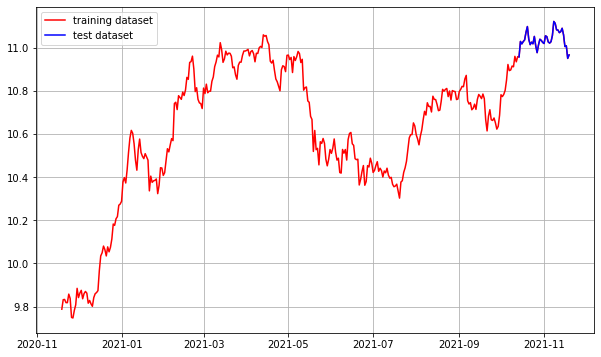

In [138]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞  

#### 1. ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞

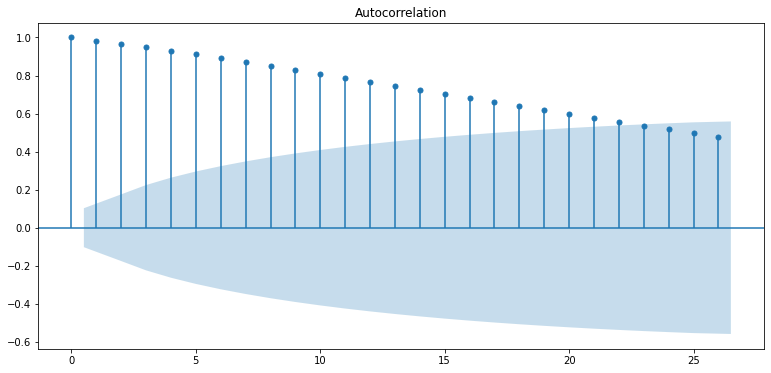

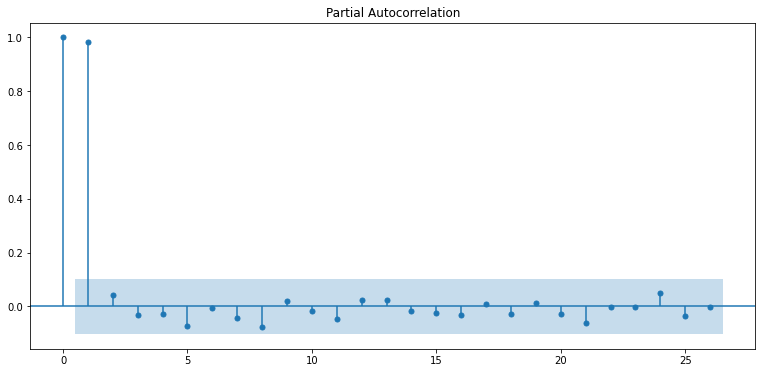

In [139]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


- qÎäî Ïñ¥Îäê Í∞íÏù¥Ïó¨ÎèÑ ÏÉÅÍ¥ÄÏóÜÏñ¥ÏÑú Ï°∞Ï†ïÌï¥Í∞ÄÎ©¥ÏÑú ÌïôÏäµ Í≤∞Í≥º ÎπÑÍµêÌïòÎ©¥ Îê†Í≤É Í∞ôÏùå  
  pÎäî 2Ïù¥ÏÉÅÏùÄ Î™®Îëê 0Í≥º Í∞ÄÍπåÏõåÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê 0 ÎòêÎäî 1Ïùò Í∞íÏúºÎ°ú ÌïôÏäµ ÏßÑÌñâ  

#### 2. Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

Results of Dickey-Fuller Test:
Test Statistic                 -19.840265
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


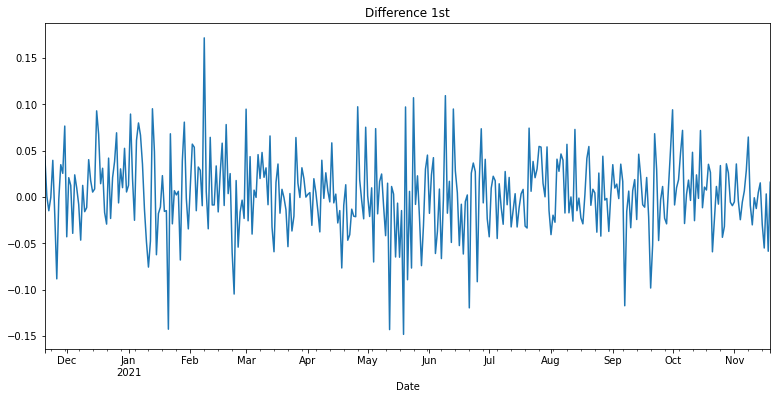

In [140]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.832252e+00
p-value                        1.756946e-14
#Lags Used                     1.200000e+01
Number of Observations Used    3.510000e+02
Critical Value (1%)           -3.449119e+00
Critical Value (5%)           -2.869810e+00
Critical Value (10%)          -2.571176e+00
dtype: float64


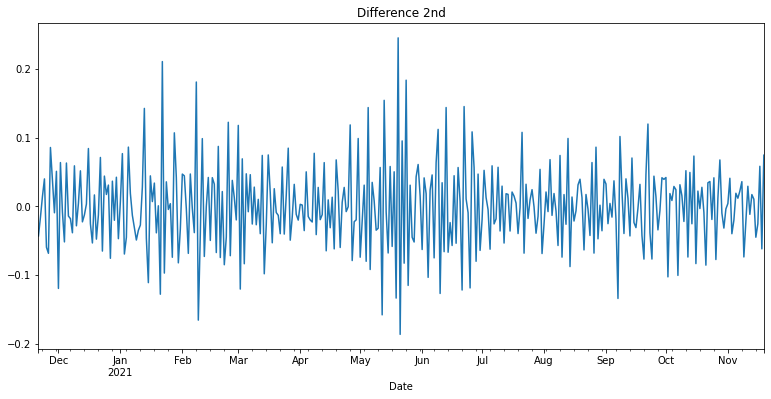

In [141]:
# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- 1Ï∞® Ï∞®Î∂ÑÏùºÎñº p-valueÍ∞Ä 0Í≥º ÏïÑÏ£º Í∞ÄÍπåÏö¥ Í∞í ÎòêÎäî 0Ïù¥ ÎÇòÏò§Îäî Í≤É Í∞ôÏùå  
  ÎπÑÌä∏ÏΩîÏù∏Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Î≥ÄÎèôÏÑ±Ïù¥ ÎÑàÎ¨¥ ÎßéÍ≥†  
  ÎïåÎ¨∏Ïóê Í≥ÑÏ†àÏÑ±Ïù¥ Ïñ¥Ï©åÎ©¥ ÏÉÅÏáÑÎêòÏßÄ ÏïäÏùÑÏàòÎèÑ ÏûàÎã§Í≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞  
  ÏùòÏô∏Î°ú ÏïÑÏ£º ÏïàÏ†ïÌôî ÎêòÏñ¥ Î≥¥ÏûÑ  

### STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏  

### ‚ë† p= 1, d= 1, q= 0

#### 1. ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®  

In [142]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  328
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 564.368
Method:                       css-mle   S.D. of innovations              0.043
Date:                Fri, 19 Nov 2021   AIC                          -1122.735
Time:                        23:02:33   BIC                          -1111.356
Sample:                    11-20-2020   HQIC                         -1118.195
                         - 10-13-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0036      0.002      1.555      0.120      -0.001       0.008
ar.L1.D.Close    -0.0445      0.055     -0.807      0.420      -0.153       0.064
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


#### 2. Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

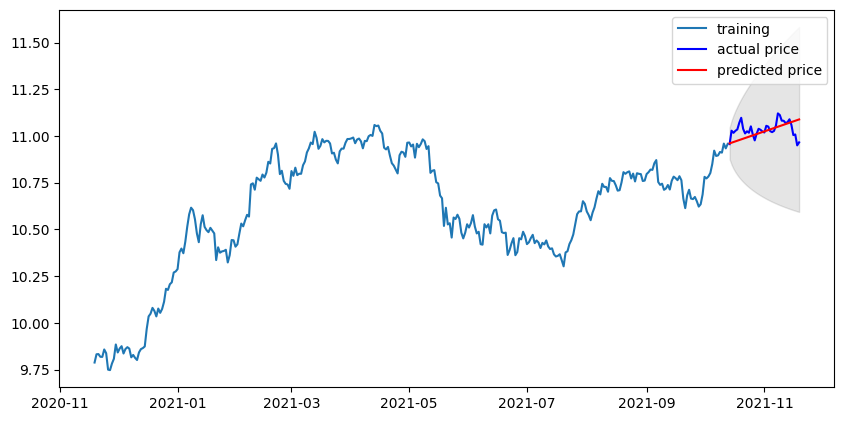

In [143]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()


#### 3. ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10387890.718749337
MAE:  2396.579527178941
RMSE:  3223.025088135266
MAPE: 3.87%


#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  10387890.718749337
MAE:  2396.579527178941
RMSE:  3223.025088135266
MAPE: 3.87%


### ‚ë° p= 1, d= 2, q= 0

#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [150]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 2, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  327
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 495.534
Method:                       css-mle   S.D. of innovations              0.053
Date:                Fri, 19 Nov 2021   AIC                           -985.068
Time:                        23:03:56   BIC                           -973.698
Sample:                    11-21-2020   HQIC                          -980.531
                         - 10-13-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -6.86e-05      0.002     -0.036      0.972      -0.004       0.004
ar.L1.D2.Close    -0.5299      0.047    -11.316      0.000      -0.622      -0.438
                                    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

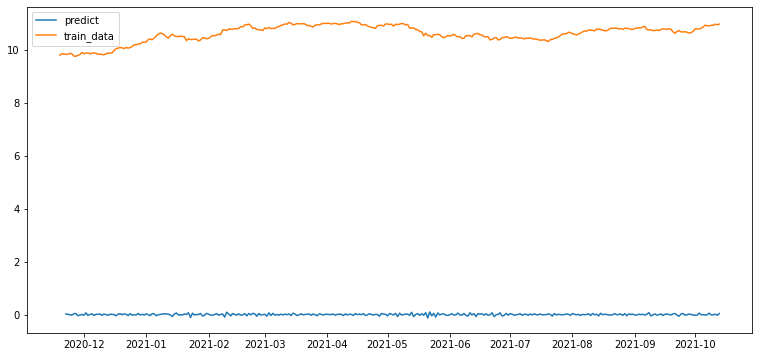

In [148]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

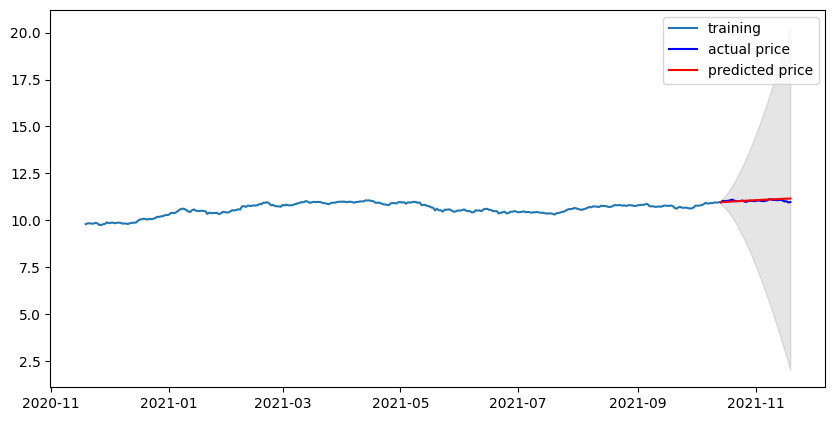

In [151]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  20705115.997612327
MAE:  3425.5964727973665
RMSE:  4550.287463184312
MAPE: 5.60%


### ‚ë¢ p= 1, d= 0, q= 0
#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [156]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  329
Model:                     ARMA(1, 0)   Log Likelihood                 562.490
Method:                       css-mle   S.D. of innovations              0.043
Date:                Fri, 19 Nov 2021   AIC                          -1118.981
Time:                        23:04:55   BIC                          -1107.592
Sample:                    11-19-2020   HQIC                         -1114.438
                         - 10-13-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.4663      0.357     29.333      0.000       9.767      11.166
ar.L1.Close     0.9956      0.005    211.002      0.000       0.986       1.005
                                    Roots       

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

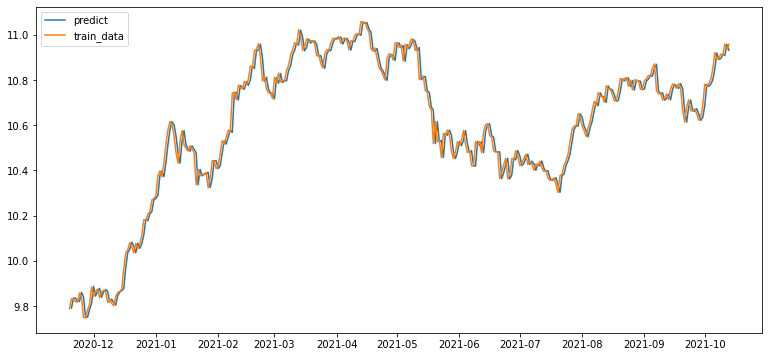

In [154]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

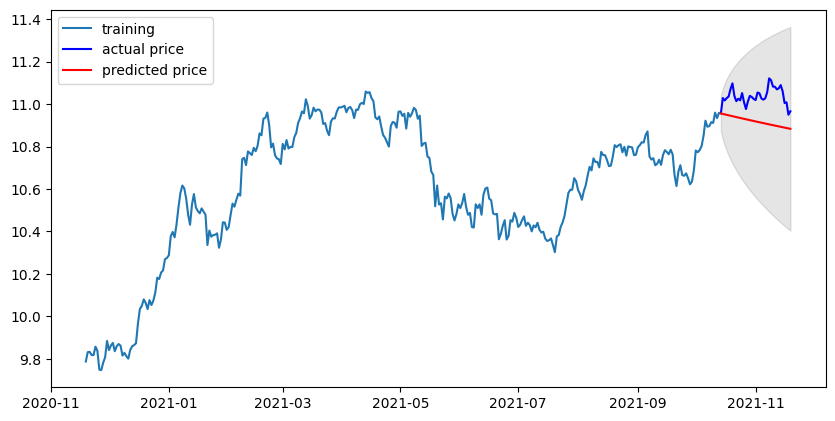

In [157]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  56138664.00406195
MAE:  6925.051485133124
RMSE:  7492.573923830311
MAPE: 11.00%


### ‚ë£ p= 0, d= 1, q= 1
#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [161]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(0, 1, 1))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  328
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 564.355
Method:                       css-mle   S.D. of innovations              0.043
Date:                Fri, 19 Nov 2021   AIC                          -1122.710
Time:                        23:07:05   BIC                          -1111.331
Sample:                    11-20-2020   HQIC                         -1118.170
                         - 10-13-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0036      0.002      1.555      0.120      -0.001       0.008
ma.L1.D.Close    -0.0428      0.054     -0.793      0.428      -0.149       0.063
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

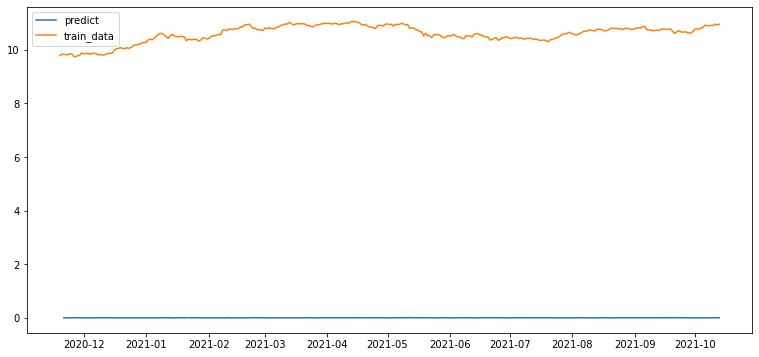

In [160]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

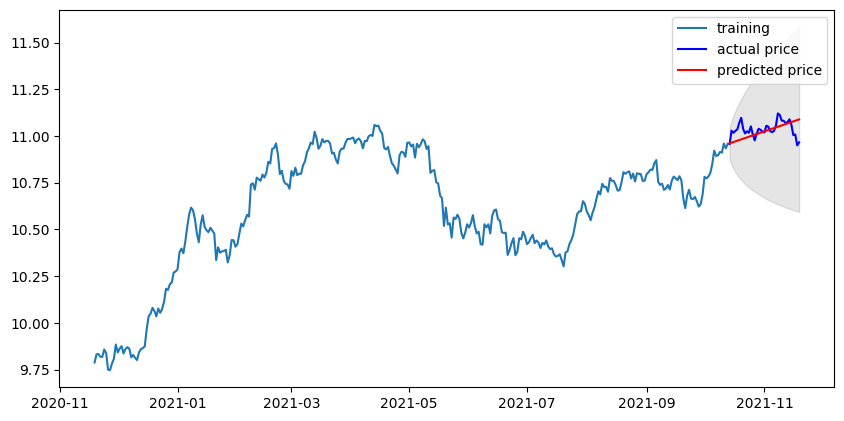

In [162]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10384404.188824678
MAE:  2395.4927800351006
RMSE:  3222.484164247309
MAPE: 3.87%


### STEP 7 ÌïôÏäµ Í≤∞Î°†  
ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú **ÏòàÏ∏° Î™®Îç∏Ïùò Î©îÌä∏Î¶≠ÏúºÎ°ú ÌôúÏö©ÌïòÍ∏∞Ïóê Ï†ÅÎãπÌïú MAPE**  
MAPE Í∞íÏù¥ Ï†ÅÏùÑÏàòÎ°ù Ï¢ãÏùÄÎç∞, Ï†ÅÍ≤å ÎÇòÏò®Í≤É Í∞ôÎã§Í≥† ÌåêÎã®Îê®

### [ÎÑ∑ÌîåÎ¶≠Ïä§ Ï£ºÍ∞Ä]  

[NFLX](https://finance.yahoo.com/quote/NFLX?p=NFLX&.tsrc=fin-srch)

### STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ  
- ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume

- ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

- Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©  

#### 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [169]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/NFLX.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

ts = df['Close']

print(type(ts))
ts.head(20)

<class 'pandas.core.series.Series'>


Date
2020-11-19    484.670013
2020-11-20    488.239990
2020-11-23    476.619995
2020-11-24    482.880005
2020-11-25    485.000000
2020-11-27    491.359985
2020-11-30    490.700012
2020-12-01    504.579987
2020-12-02    503.380005
2020-12-03    497.519989
2020-12-04    498.309998
2020-12-07    515.780029
2020-12-08    512.659973
2020-12-09    493.600006
2020-12-10    501.089996
2020-12-11    503.220001
2020-12-14    522.419983
2020-12-15    519.780029
2020-12-16    524.830017
2020-12-17    532.900024
Name: Close, dtype: float64

- Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÎÇ†ÏßúÍ∞Ä  
  2,3,1,5,5,4 Ïùº Í∏∞Í∞ÑÏúºÎ°ú ÏàòÏßëÎêòÏñ¥ÏÑú, window ÏßÄÏ†ïÏù¥ Ï°∞Í∏à ÍπåÎã§Î°úÏö∏ Ïàò ÎèÑ ÏûàÏùÑ Í≤É Í∞ôÏùå

### STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ  

#### 1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [165]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 

Series([], Name: Close, dtype: float64)

- Í≤∞Ï∏°Ïπò ÏóÜÏùå  

#### 2. Î°úÍ∑∏ Î≥ÄÌôò
- Ïö∞Î¶¨Îäî Ïï†Ï¥àÏóê Ïù¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ ÏÑ∏ÏõÄ  
  Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê ÏïàÏ†ïÏ†ÅÏù∏(Stationary) Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µÌï¥ÏïºÌï®  
  
  
- ÏãúÍ∞ÑÏ∂îÏù¥Ïóê Îî∞Îùº Î∂ÑÏÇ∞Ïù¥ Ï†êÏ†ê Ïª§ÏßÄÍ≥† ÏûàÏùÑ Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê  
  Î°úÍ∑∏Ìï®ÏàòÎ°ú Î≥ÄÌôòÌï¥ÏÑú ÏãúÍ∞ÑÏ∂îÏù¥Ïóê Îî∞Î•∏ Î∂ÑÏÇ∞ÏùÑ ÏùºÏ†ïÌïòÍ≤å ÎßåÎì¶  

In [166]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

### STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù  

#### 1. Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù

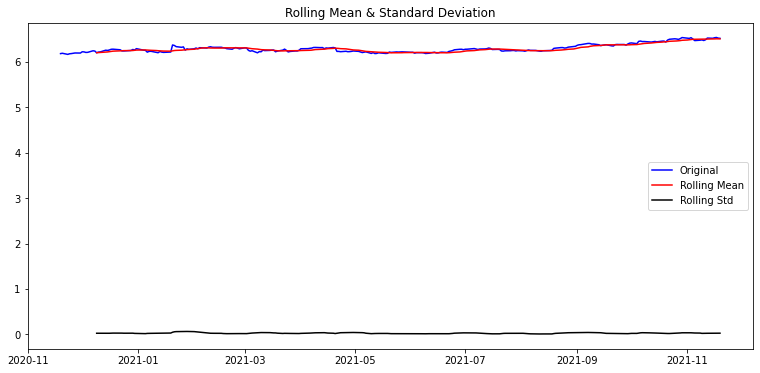

In [186]:
plot_rolling_statistics(ts_log, window=14)

#### 2. Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test

In [184]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.392983
p-value                          0.911264
#Lags Used                       5.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


 - p-value= 0.911264 ÎÜíÏùÄ ÏàòÏπòÎùºÍ≥† ÌåêÎã®Îê®  
   -> Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å Ïñ¥Î†§ÏõÄ  
   -> Îç∞Ïù¥ÌÑ∞ ÏïàÏ†ïÏ†ÅÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ = Î∂àÏïàÏ†ïÌïú Îç∞Ïù¥ÌÑ∞ Í∞ôÏùå  

#### 3. ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥  

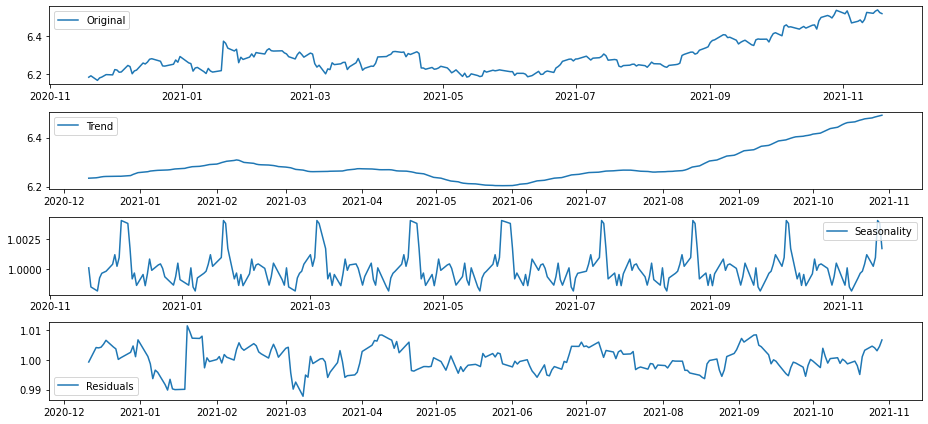

In [180]:
#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### 4. Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏  

In [181]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.659457e+00
p-value                        9.453280e-07
#Lags Used                     4.000000e+00
Number of Observations Used    2.180000e+02
Critical Value (1%)           -3.460708e+00
Critical Value (5%)           -2.874891e+00
Critical Value (10%)          -2.573886e+00
dtype: float64


 - p-value ÎèÑ Ïó¨Ï†ÑÌûà ÎÜíÏùå  

### STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±  

#### 1. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨  

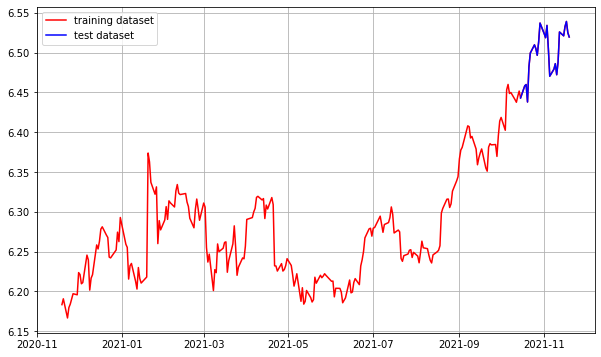

In [182]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞  

#### 1. ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞

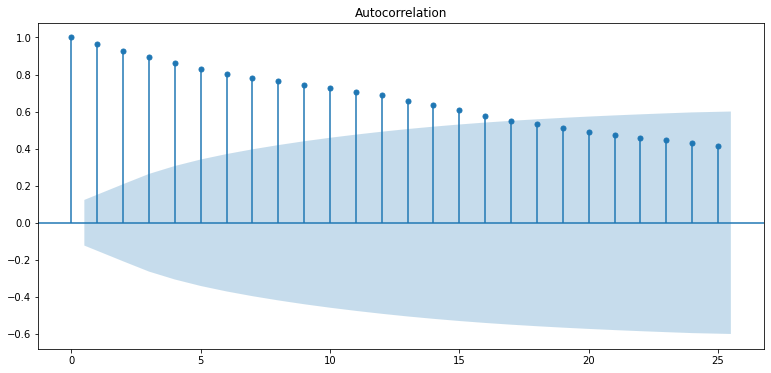

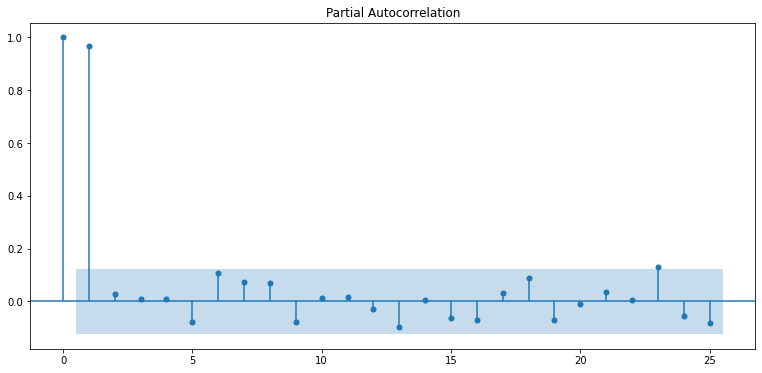

In [187]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()


- qÎäî Ïñ¥Îäê Í∞íÏù¥Ïó¨ÎèÑ ÏÉÅÍ¥ÄÏóÜÏñ¥ÏÑú Ï°∞Ï†ïÌï¥Í∞ÄÎ©¥ÏÑú ÌïôÏäµ Í≤∞Í≥º ÎπÑÍµêÌïòÎ©¥ Îê†Í≤É Í∞ôÏùå  
  pÎäî 2Ïù¥ÏÉÅÏùÄ Î™®Îëê 0Í≥º Í∞ÄÍπåÏõåÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê 0 ÎòêÎäî 1Ïùò Í∞íÏúºÎ°ú ÌïôÏäµ ÏßÑÌñâ  

#### 2. Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

Results of Dickey-Fuller Test:
Test Statistic                -8.246550e+00
p-value                        5.534229e-13
#Lags Used                     4.000000e+00
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


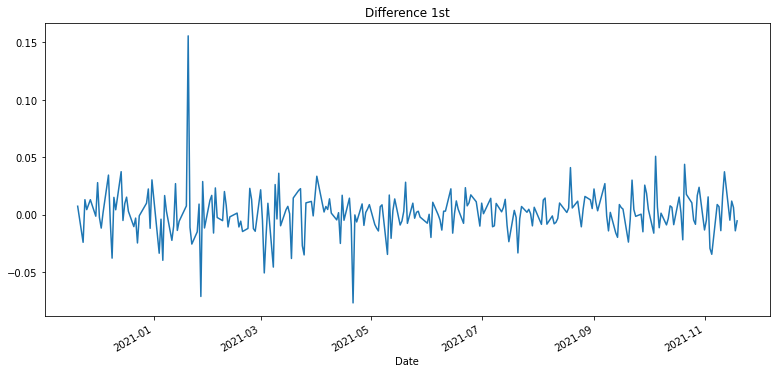

In [188]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.670591e+00
p-value                        1.597556e-11
#Lags Used                     1.400000e+01
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


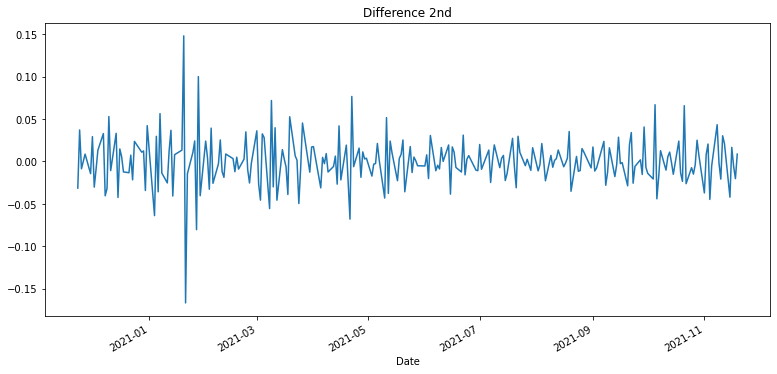

In [189]:
# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- 2Ï∞® Ï∞®Î∂ÑÏùºÎïåÍ∞Ä Ìõ®Ïî¨Îçî p-valueÍ∞Ä Îçî ÏïàÏ†ïÏ†ÅÏúºÎ°ú Î≥¥Ïù∏Îã§

### STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏  

### ‚ë† p= 1, d= 1, q= 0

#### 1. ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®  

In [190]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  226
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 563.536
Method:                       css-mle   S.D. of innovations              0.020
Date:                Fri, 19 Nov 2021   AIC                          -1121.072
Time:                        23:25:01   BIC                          -1110.810
Sample:                             1   HQIC                         -1116.931
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0012      0.001      0.964      0.335      -0.001       0.004
ar.L1.D.Close    -0.0842      0.066     -1.273      0.203      -0.214       0.045
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2. Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

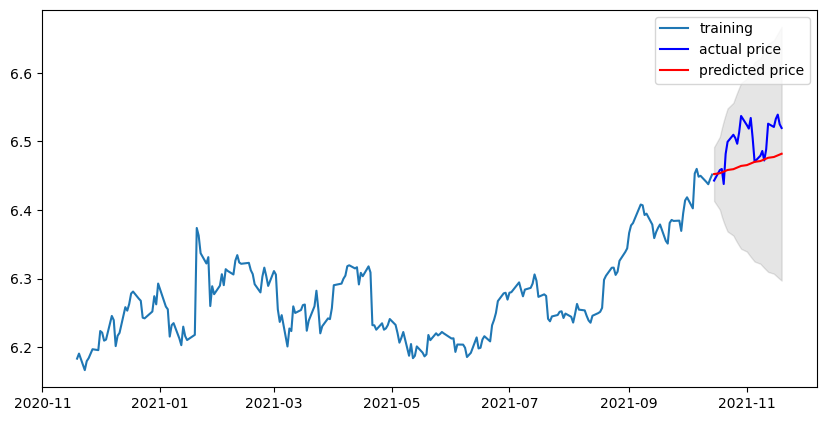

In [191]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 3. ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [192]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  719.9768884123818
MAE:  22.665212214596426
RMSE:  26.83238506753326
MAPE: 3.35%


#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  719.9768884123818
MAE:  22.665212214596426
RMSE:  26.83238506753326
MAPE: 3.35%


### ‚ë° p= 1, d= 2, q= 0

#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [197]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 2, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  225
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 505.029
Method:                       css-mle   S.D. of innovations              0.026
Date:                Fri, 19 Nov 2021   AIC                          -1004.057
Time:                        23:26:11   BIC                           -993.809
Sample:                             2   HQIC                          -999.921
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.439e-05      0.001      0.039      0.969      -0.002       0.002
ar.L1.D2.Close    -0.5000      0.058     -8.675      0.000      -0.613      -0.387
                                    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

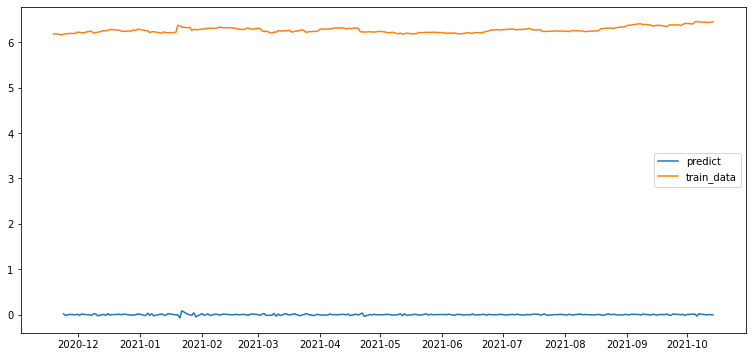

In [195]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

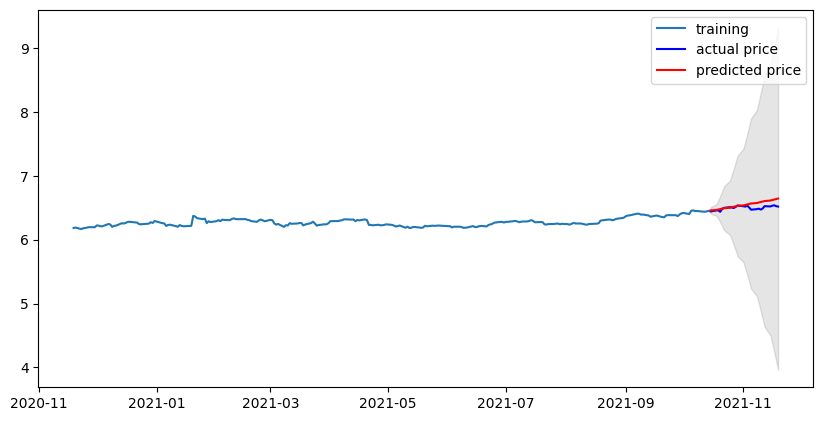

In [198]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2277.172781296461
MAE:  36.29856275318676
RMSE:  47.719731571923795
MAPE: 5.44%


### ‚ë¢ p= 1, d= 0, q= 0
#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [203]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  227
Model:                     ARMA(1, 0)   Log Likelihood                 564.857
Method:                       css-mle   S.D. of innovations              0.020
Date:                Fri, 19 Nov 2021   AIC                          -1123.714
Time:                        23:27:02   BIC                          -1113.439
Sample:                             0   HQIC                         -1119.568
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.2834      0.035    179.735      0.000       6.215       6.352
ar.L1.Close     0.9659      0.019     50.709      0.000       0.929       1.003
                                    Roots       

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

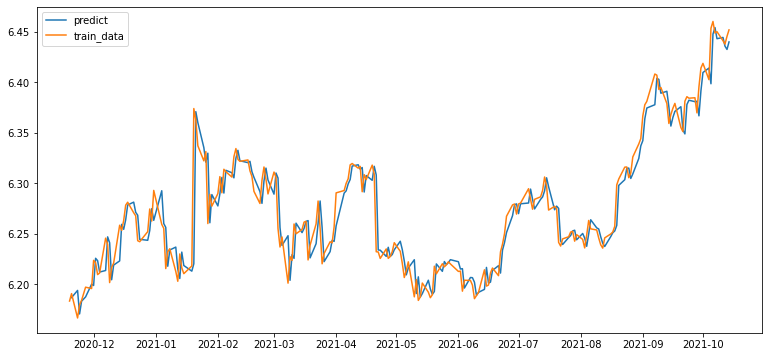

In [201]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

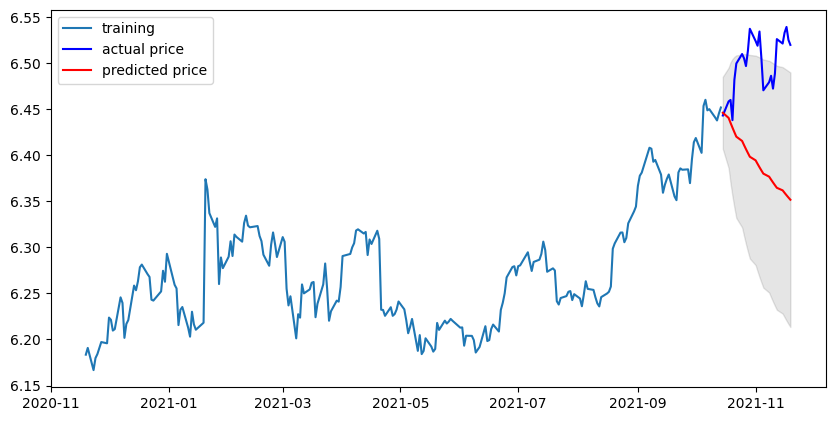

In [204]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  5610.36137386122
MAE:  67.67983648306631
RMSE:  74.90234558317397
MAPE: 10.06%


### ‚ë£ p= 0, d= 1, q= 1
#### 1)  ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [209]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(0, 1, 1))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  226
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 563.717
Method:                       css-mle   S.D. of innovations              0.020
Date:                Fri, 19 Nov 2021   AIC                          -1121.433
Time:                        23:28:05   BIC                          -1111.171
Sample:                             1   HQIC                         -1117.292
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0012      0.001      0.992      0.321      -0.001       0.004
ma.L1.D.Close    -0.1033      0.073     -1.413      0.158      -0.247       0.040
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2) ARIMA ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî

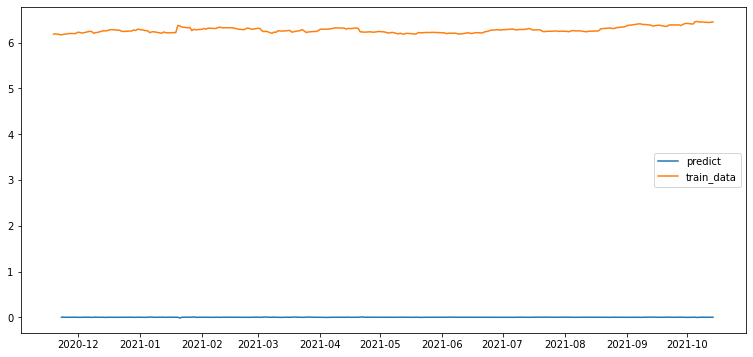

In [207]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 3) Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ  
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÎç∞Ïù¥ÌÑ∞ ÏòàÏ∏°  
forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°  

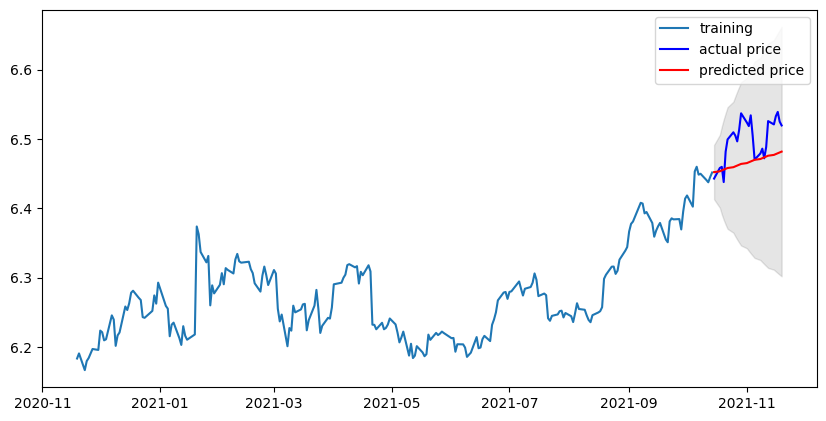

In [210]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

#### 4) ÏßÄÏàò Î≥ÄÌôò  
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏóàÏùå  
-> Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞ Í∞ÄÎä•  

exp() Î°ú ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶∞ ÌõÑÏóê  
-> MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞  

In [211]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  725.5828004804948
MAE:  22.766993510256743
RMSE:  26.936644194860182
MAPE: 3.37%


### STEP 7 ÌïôÏäµ Í≤∞Î°†  
ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú **ÏòàÏ∏° Î™®Îç∏Ïùò Î©îÌä∏Î¶≠ÏúºÎ°ú ÌôúÏö©ÌïòÍ∏∞Ïóê Ï†ÅÎãπÌïú MAPE**  
MAPE Í∞íÏù¥ Ï†ÅÏùÑÏàòÎ°ù Ï¢ãÏùÄÎç∞, Ï†ÅÍ≤å ÎÇòÏò®Í≤É Í∞ôÎã§Í≥† ÌåêÎã®Îê®

### ÌöåÍ≥†  

#### üíöÏñ¥Î†§Ïõ†Îçò Ï†ê  
-  window size ÏÑ§Ï†ï  
   ÎÖ∏Îìú Í≥µÎ∂ÄÌïòÎ©¥ÏÑú Îã§Î§òÎçò Îç∞Ïù¥ÌÑ∞Îäî Îç∞Ïù¥ÌÑ∞ ÏäπÍ∞ù, Ïò®ÎèÑÎ≥ÄÌôîÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ ÏòÄÏñ¥ÏÑú  
   Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ∞ÄÏùò ÏãúÍ∞ÅÏúºÎ°ú Î≥¥Í±∞ÎÇò, ÏãúÍ∞ÅÌôîÎêú Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Î©¥ÏÑú  
   Ï£ºÍ∏∞ÏÑ±Ïù¥ 12Îã¨ Îã®ÏúÑÎ°ú ÌòïÏÑ±Îê† Í≤ÉÏùÑ ÏòàÏ∏°ÌïòÏó¨ ÏÑ§Ï†ïÌï†Ïàò ÏûàÏóàÏùå  
   ÌïòÏßÄÎßå Ï£ºÏãù Îç∞Ïù¥ÌÑ∞Îäî ÏãúÍ∞ÅÌôîÎ•º Ìï¥ÎèÑ  
   Ï£ºÍ∏∞ÏÑ±ÏùÑ Í∞ÄÏßÑ Íµ¨Í∞ÑÏùÑ ÏÑ§Ï†ïÌïòÍ∏∞ ÏâΩÏßÄ ÏïäÏïòÏùå  

#### üíöÎî∞Î°ú Í≥µÎ∂ÄÌïú Î∂ÄÎ∂Ñ  
##### 1) Ï≤òÏùåÏóî Ï£ºÍ∏∞ÏÑ±Í≥º Í≥ÑÏ†àÏÑ±Ïùò Ï∞®Ïù¥Ï†êÏùÑ Ïù¥Ìï¥ÌïòÍ∏∞ Ïñ¥Î†§Ïõ†Ïùå  
  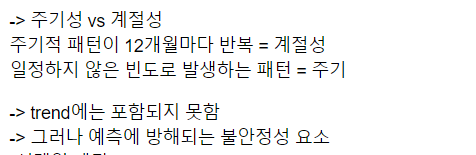
   
   
##### 2) 1, 2Ï∞® Ï∞®Î∂ÑÏù¥ Î¨¥ÏóáÏùÑ ÏùòÎØ∏ÌïòÎäî Í∞Ä  
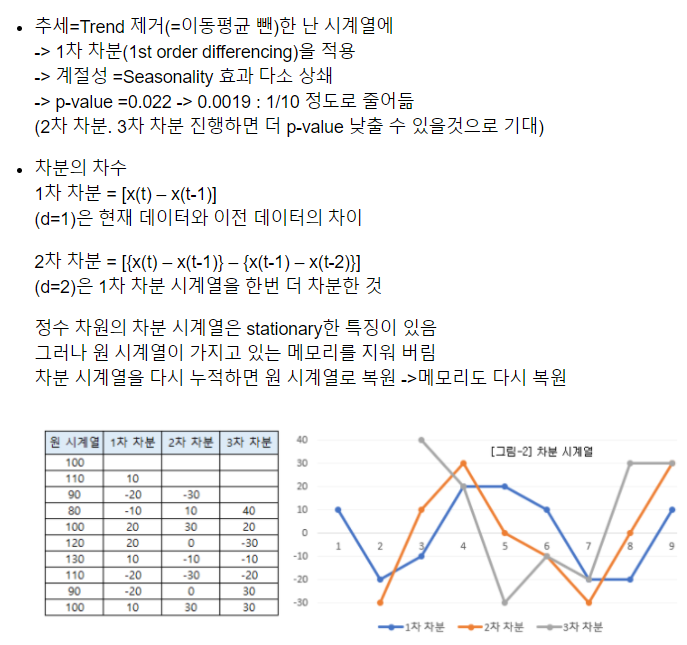

#### üíöÍ∞úÏÑ†ÌïòÍ≥† Ïã∂ÏùÄÏ†ê  
##### 1) ÏãúÍ∞ÅÌôî  
Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ std Í∑∏ÎûòÌîÑÍ∞Ä ÎÑàÎ¨¥ Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ÎÇòÏÑú  
  Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôîÍ∞Ä Ïûò ÏïàÎêòÍ≥† ÏûàÎäîÎç∞   
  Ïù¥Î•º Í∞úÏÑ†ÏãúÌÇ¨ Ïàò ÏûàÎäî Î∞©Î≤ïÏùÑ Í≥†ÏïàÌï¥Î≥ºÍ≤É  
  ÏãúÍ∞ÑÏù¥ ÏóÜÏñ¥ÏÑú ÏßÑÌñâÌï¥Î≥¥ÏßÄÎäî Î™ªÌï®  
  Ï∂îÌõÑ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôîÏôÄ Ìï®Ïàò Íµ¨ÌòÑÏóê ÎåÄÌïú Îä•Î†•Ïù¥ Î∞úÌòÑÎêòÍ∏∏ Î∞îÎûå „Ö†  
  
##### 2) MSE, MAE, RMSE, MAPE  
MAPE ÏàòÏπòÎ•º Î≥¥Í≥† Îç∞Ïù¥ÌÑ∞Î•º ÌåêÎã®ÌñàÎäîÎç∞  
Ïù¥Ïóê ÎåÄÌïú Í∞Å ÏàòÏπòÎì§Ïù¥ ÎúªÌïòÎäî ÏùòÎØ∏Î•º ÏïÑÏßÅ Ï†úÎåÄÎ°ú Í≥µÎ∂ÄÌïòÏßÄ Î™ªÌñàÏùå  
ÏïåÏïÑÎ≥¥ÎãàÍπå ÌÜµÍ≥ÑÌïôÏ†Å ÏßÄÏãùÏù¥ Î∞±Í∑∏ÎùºÏö¥ÎìúÎ°ú Ï¢Ä ÌïÑÏöîÌïòÍ∏∏Îûò  
Í≥µÎ∂ÄÌïòÎã§Í∞Ä Îã§ Ïù¥Ìï¥Î™ªÌñàÏùå  
ÎÇòÏ§ëÏóê Î≥∏ ÏùòÎØ∏Î•º ÌåêÎã®Ìï† Ïàò ÏûàÍ∏∞Î•º „Ö†